<a href="https://colab.research.google.com/github/badboizalai/Speaker-Identification/blob/main/Copy_of_SLP_Speaker_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare Data

In [ ]:
!tar -xzvf "/content/drive/MyDrive/SLP/train-clean-100.tar.gz"

Streaming output truncated to the last 5000 lines.
LibriSpeech/train-clean-100/2136/5143/2136-5143-0024.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0012.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0044.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0003.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0010.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0025.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0043.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0004.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0026.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0015.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0032.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0027.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0039.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0020.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0023.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0007.flac
LibriSpeech/train-cle

In [ ]:
import os
base_dir = '/content/LibriSpeech/train-clean-100'

speaker_labels = {}
speaker_id_mapping = {}

speaker_index = 1

for speaker_id in os.listdir(base_dir):
    speaker_dir = os.path.join(base_dir, speaker_id)
    if os.path.isdir(speaker_dir):
        for sub_dir in os.listdir(speaker_dir):
            sub_dir_path = os.path.join(speaker_dir, sub_dir)
            if os.path.isdir(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    if file.endswith('.flac'):
                        speaker_label = f"Speaker {speaker_index}"
                        if speaker_label not in speaker_labels:
                            speaker_labels[speaker_label] = []
                        speaker_labels[speaker_label].append(os.path.join(sub_dir_path, file))

        speaker_id_mapping[speaker_index] = speaker_id
        speaker_index += 1

# Hiển thị kết quả
for speaker, files in speaker_labels.items():
    print(f"{speaker}, Number of files: {len(files)}")
    for file in files:
        print(f"  - {file}")

Streaming output truncated to the last 5000 lines.
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0012.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0027.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0029.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0016.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0014.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0032.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0013.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0010.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0006.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0017.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0008.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0000.flac
  - /content/LibriSpeech/train-clean-100/5163/18515/5163-18515-0039.flac


In [ ]:
for speaker, files in speaker_labels.items():
    print(f"{speaker}, Number of files: {len(files)}")

Speaker 1, Number of files: 116
Speaker 2, Number of files: 107
Speaker 3, Number of files: 116
Speaker 4, Number of files: 106
Speaker 5, Number of files: 126
Speaker 6, Number of files: 113
Speaker 7, Number of files: 112
Speaker 8, Number of files: 115
Speaker 9, Number of files: 97
Speaker 10, Number of files: 100
Speaker 11, Number of files: 110
Speaker 12, Number of files: 165
Speaker 13, Number of files: 113
Speaker 14, Number of files: 114
Speaker 15, Number of files: 114
Speaker 16, Number of files: 110
Speaker 17, Number of files: 111
Speaker 18, Number of files: 122
Speaker 19, Number of files: 123
Speaker 20, Number of files: 108
Speaker 21, Number of files: 115
Speaker 22, Number of files: 108
Speaker 23, Number of files: 113
Speaker 24, Number of files: 138
Speaker 25, Number of files: 128
Speaker 26, Number of files: 130
Speaker 27, Number of files: 60
Speaker 28, Number of files: 129
Speaker 29, Number of files: 118
Speaker 30, Number of files: 126
Speaker 31, Number of

In [ ]:
import os
import shutil

base_dir = '/content/LibriSpeech/train-clean-100'
output_dir = '/content/drive/MyDrive/SLP/Data_Train_SI'

# Kiểm tra nếu thư mục đầu ra chưa tồn tại thì tạo mới
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

speaker_labels = {}
speaker_id_mapping = {}

speaker_index = 1

# Lặp qua các speaker và lấy 20 speaker đầu tiên
for speaker_id in os.listdir(base_dir):
    speaker_dir = os.path.join(base_dir, speaker_id)
    if os.path.isdir(speaker_dir):
        for sub_dir in os.listdir(speaker_dir):
            sub_dir_path = os.path.join(speaker_dir, sub_dir)
            if os.path.isdir(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    if file.endswith('.flac'):
                        speaker_label = f"Speaker {speaker_index}"
                        if speaker_label not in speaker_labels:
                            speaker_labels[speaker_label] = []
                        speaker_labels[speaker_label].append(os.path.join(sub_dir_path, file))

        speaker_id_mapping[speaker_index] = speaker_id
        speaker_index += 1
        if speaker_index > 20:  # Chỉ lấy 20 speaker đầu tiên
            break

# Di chuyển các file của 20 speaker vào thư mục mới
for speaker, files in speaker_labels.items():
    speaker_folder = os.path.join(output_dir, speaker)
    if not os.path.exists(speaker_folder):
        os.makedirs(speaker_folder)

    for file in files:
        # Di chuyển file vào thư mục của speaker
        shutil.move(file, os.path.join(speaker_folder, os.path.basename(file)))

# Hiển thị kết quả
for speaker in os.listdir(output_dir):
    speaker_folder = os.path.join(output_dir, speaker)
    if os.path.isdir(speaker_folder):
        print(f"{speaker}, Number of files: {len(os.listdir(speaker_folder))}")

Speaker 1, Number of files: 116
Speaker 2, Number of files: 107
Speaker 3, Number of files: 116
Speaker 4, Number of files: 106
Speaker 5, Number of files: 126
Speaker 6, Number of files: 113
Speaker 7, Number of files: 112
Speaker 8, Number of files: 115
Speaker 9, Number of files: 97
Speaker 10, Number of files: 100
Speaker 11, Number of files: 110
Speaker 12, Number of files: 165
Speaker 13, Number of files: 113
Speaker 14, Number of files: 114
Speaker 15, Number of files: 114
Speaker 16, Number of files: 110
Speaker 17, Number of files: 111
Speaker 18, Number of files: 122
Speaker 19, Number of files: 123
Speaker 20, Number of files: 108


# Data Preprocessing

In [ ]:
import os
import shutil

train_test_dir = '/content/drive/MyDrive/SLP/Data_Train_SI'

train_dir = os.path.join(train_test_dir, 'train')
test_dir = os.path.join(train_test_dir, 'test')

for folder in [train_dir, test_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)

for speaker in os.listdir(train_test_dir):
    speaker_folder = os.path.join(train_test_dir, speaker)

    if os.path.isdir(speaker_folder) and speaker != 'train' and speaker != 'test':
        flac_files = [f for f in os.listdir(speaker_folder) if f.endswith('.flac')]

        test_files = flac_files[-5:]

        speaker_test_dir = os.path.join(test_dir, speaker)
        if not os.path.exists(speaker_test_dir):
            os.makedirs(speaker_test_dir)

        for test_file in test_files:
            shutil.move(os.path.join(speaker_folder, test_file), os.path.join(speaker_test_dir, test_file))

        train_files = flac_files[:-5]

        speaker_train_dir = os.path.join(train_dir, speaker)
        if not os.path.exists(speaker_train_dir):
            os.makedirs(speaker_train_dir)

        for train_file in train_files:
            shutil.move(os.path.join(speaker_folder, train_file), os.path.join(speaker_train_dir, train_file))

print("Tập dữ liệu đã được chia thành công. Sau đây là số lượng file trong các thư mục train và test:")

for folder in ['train', 'test']:
    folder_path = os.path.join(train_test_dir, folder)
    for speaker in os.listdir(folder_path):
        speaker_folder = os.path.join(folder_path, speaker)
        if os.path.isdir(speaker_folder):
            print(f"{folder.capitalize()} - {speaker}: {len(os.listdir(speaker_folder))} files")

Tập dữ liệu đã được chia thành công. Sau đây là số lượng file trong các thư mục train và test:
Train - Speaker 1: 111 files
Train - Speaker 2: 102 files
Train - Speaker 3: 111 files
Train - Speaker 4: 101 files
Train - Speaker 5: 121 files
Train - Speaker 6: 108 files
Train - Speaker 7: 107 files
Train - Speaker 8: 110 files
Train - Speaker 9: 92 files
Train - Speaker 10: 95 files
Train - Speaker 11: 105 files
Train - Speaker 12: 160 files
Train - Speaker 13: 108 files
Train - Speaker 14: 109 files
Train - Speaker 15: 109 files
Train - Speaker 16: 105 files
Train - Speaker 17: 106 files
Train - Speaker 18: 117 files
Train - Speaker 19: 118 files
Train - Speaker 20: 103 files
Test - Speaker 1: 5 files
Test - Speaker 2: 5 files
Test - Speaker 3: 5 files
Test - Speaker 4: 5 files
Test - Speaker 5: 5 files
Test - Speaker 6: 5 files
Test - Speaker 7: 5 files
Test - Speaker 8: 5 files
Test - Speaker 9: 5 files
Test - Speaker 10: 5 files
Test - Speaker 11: 5 files
Test - Speaker 12: 5 files
T

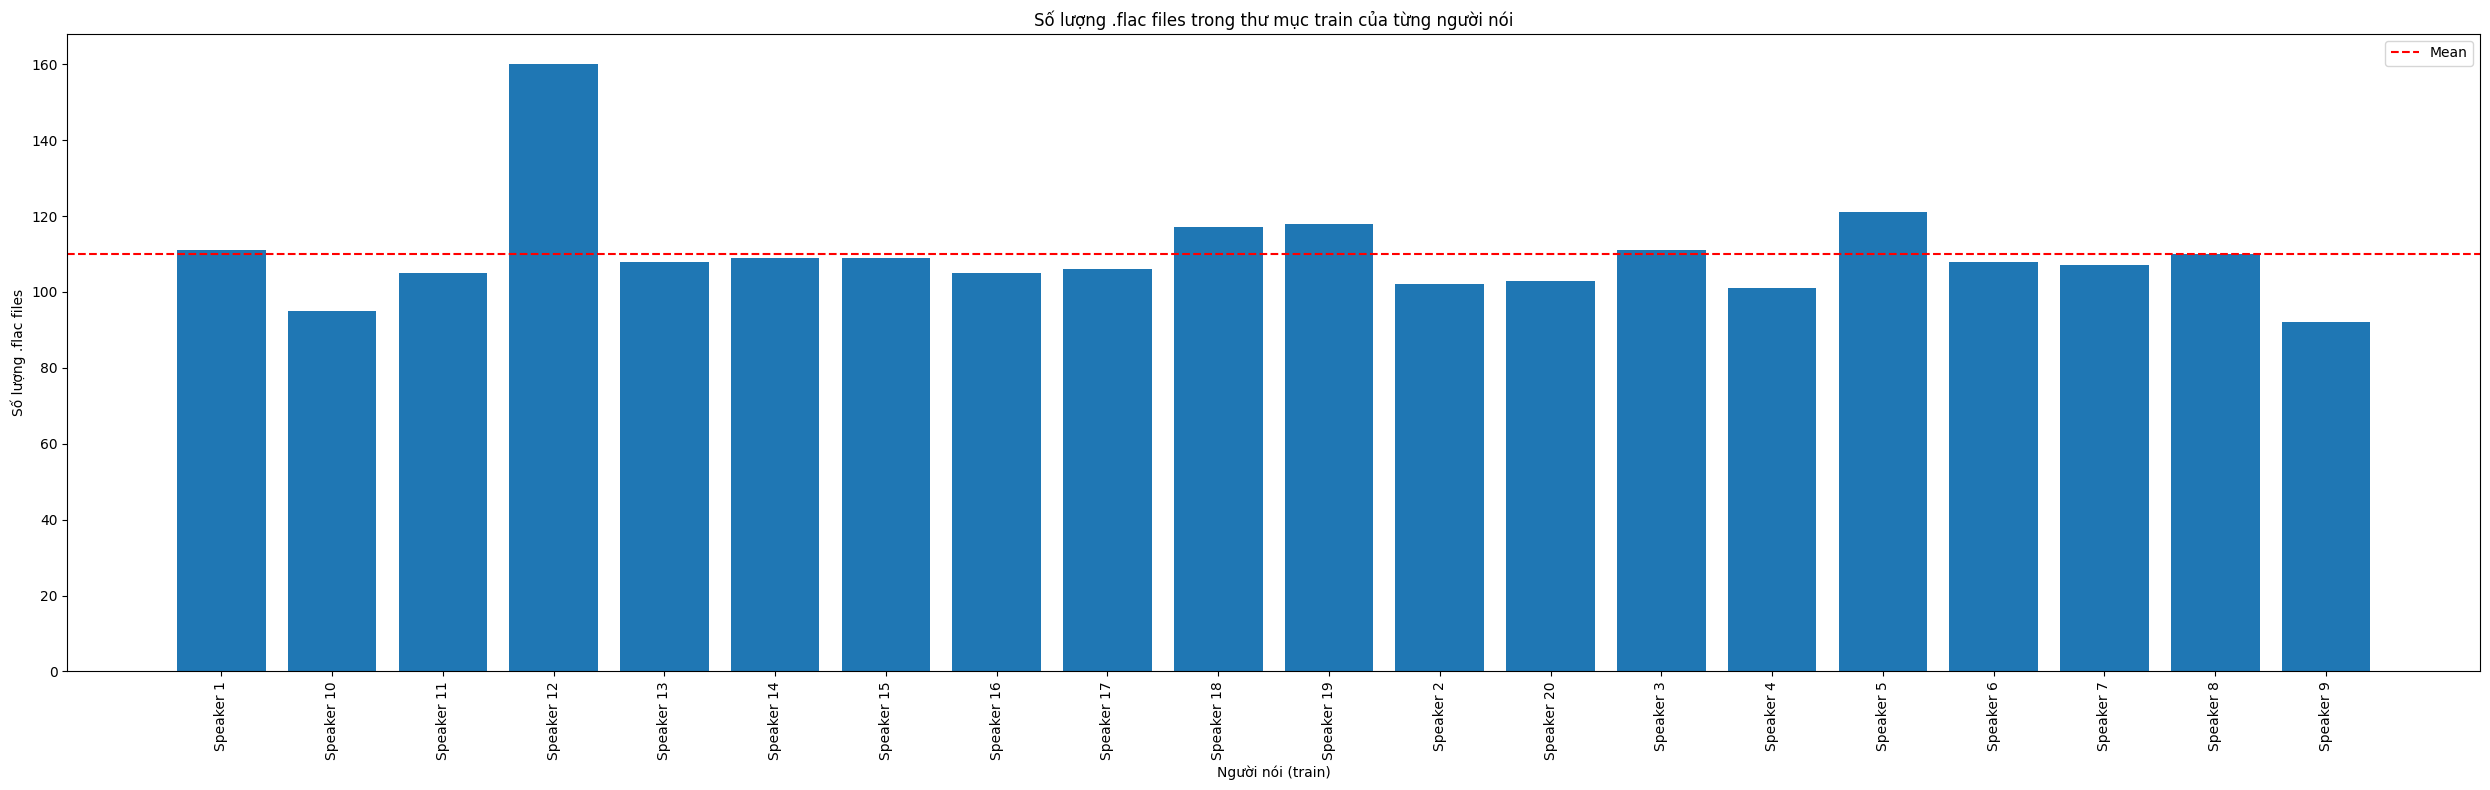

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/SLP/Data_Train_SI/train'

subfolder_counts = {}

for speaker in os.listdir(train_dir):
    speaker_folder = os.path.join(train_dir, speaker)

    if os.path.isdir(speaker_folder):
        flac_files = [f for f in os.listdir(speaker_folder) if f.endswith('.flac')]
        if flac_files:
            subfolder_counts[speaker] = len(flac_files)

subfolder_names = list(subfolder_counts.keys())
file_counts = list(subfolder_counts.values())

mean_file_count = sum(file_counts) / len(file_counts)

sorted_data = sorted(zip(subfolder_names, file_counts), key=lambda x: x[0])
subfolder_names, file_counts = zip(*sorted_data)

plt.figure(figsize=(25, 8))
plt.bar(subfolder_names, file_counts)
plt.axhline(mean_file_count, color="red", linestyle="--", label="Mean")
plt.xlabel("Người nói (train)")
plt.ylabel("Số lượng .flac files")
plt.xticks(rotation=90)
plt.title("Số lượng .flac files trong thư mục train của từng người nói")
plt.legend()
plt.tight_layout()

plt.show()


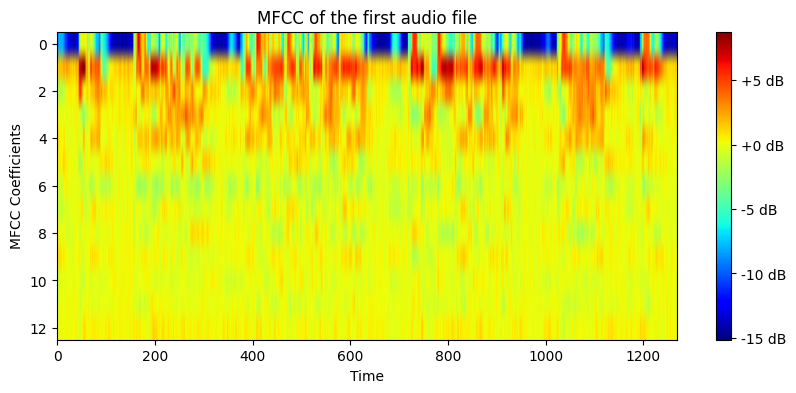

In [ ]:
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt

def audio_to_mfcc(audio, sampling_rate=16000, frame_length=400, frame_step=160, num_mfcc=13):
    spectrogram = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step)
    spectrogram = tf.abs(spectrogram)

    num_spectrogram_bins = spectrogram.shape[-1]
    lower_edge_hertz = 125
    upper_edge_hertz = 7500
    num_mel_bins = 23

    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(num_mel_bins, num_spectrogram_bins, sampling_rate, lower_edge_hertz, upper_edge_hertz)
    mel_spectrogram = tf.tensordot(spectrogram, linear_to_mel_weight_matrix, 1)
    log_mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)

    mfcc = tf.signal.dct(log_mel_spectrogram, type=2, axis=-1, norm="ortho")
    return mfcc[:, :num_mfcc]

audio_path = "/content/drive/MyDrive/Data_Train_SI/Speaker 1/2691-156745-0000.flac"
audio, sr = librosa.load(audio_path, sr=16000)

audio_tensor = tf.convert_to_tensor(audio, dtype=tf.float32)

mfcc = audio_to_mfcc(audio_tensor)

plt.figure(figsize=(10, 4))
plt.imshow(mfcc.numpy().T, aspect='auto', cmap='jet')
plt.title('MFCC of the first audio file')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar(format="%+2.0f dB")
plt.show()


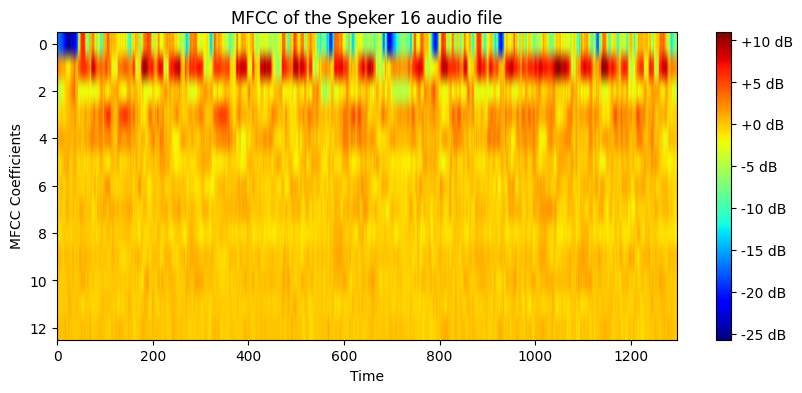

In [ ]:

audio_path = "/content/drive/MyDrive/Data_Train_SI/Speaker 16/6454-107462-0000.flac"
audio, sr = librosa.load(audio_path, sr=16000)

audio_tensor = tf.convert_to_tensor(audio, dtype=tf.float32)

mfcc = audio_to_mfcc(audio_tensor)

plt.figure(figsize=(10, 4))
plt.imshow(mfcc.numpy().T, aspect='auto', cmap='jet')
plt.title('MFCC of the Speker 16 audio file')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar(format="%+2.0f dB")
plt.show()

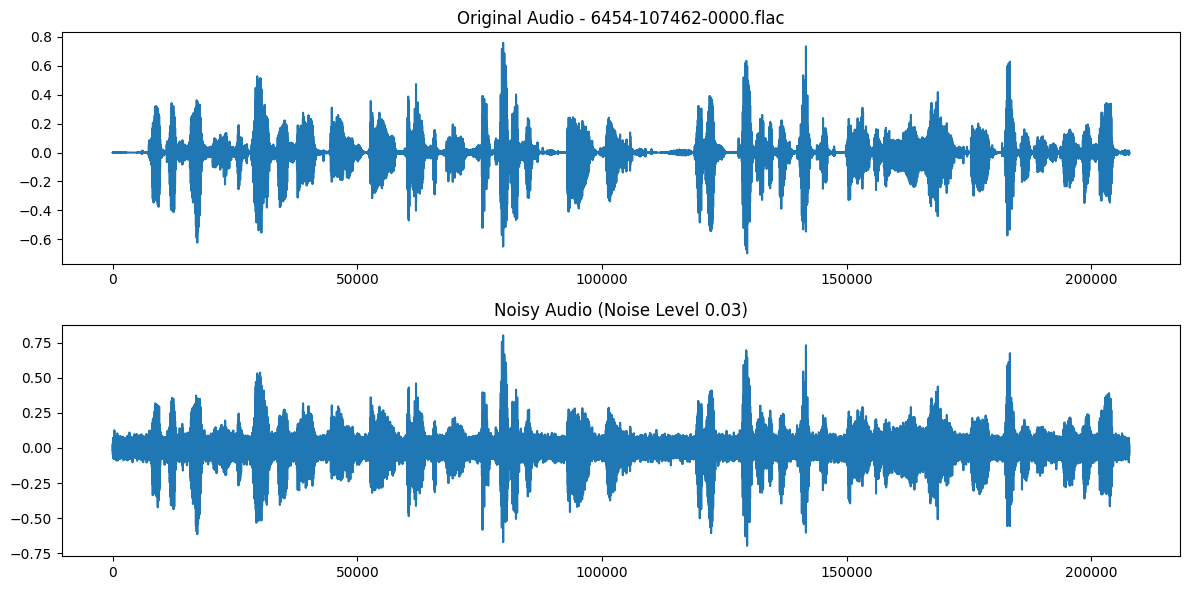

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import tensorflow as tf

# Function to add noise to audio (TensorFlow compatible version)
def add_noise(audio, noise_level=0.03):
    """
    Adds noise to the audio signal using TensorFlow.
    noise_level: the intensity of the noise.
    """
    noise = tf.random.normal(shape=tf.shape(audio), mean=0.0, stddev=1.0)  # Generate Gaussian noise
    noisy_audio = audio + noise_level * noise  # Add noise to audio
    return noisy_audio
# Function to process the audio files (this is used in the dataset processing)
def process_audio(path, apply_noise=False, noise_level=0.03):
    """
    Loads the audio from the given path and optionally adds noise.
    path: path to the audio file.
    apply_noise: whether to add noise or not.
    noise_level: the intensity of the noise.
    """
    # Read the audio file into a tensor
    audio_binary = tf.io.read_file(path)

    # Decode the audio binary into audio data (wav format assumed)
    audio, _ = tf.audio.decode_wav(audio_binary)

    # Convert to mono if stereo (average the channels)
    audio = tf.reduce_mean(audio, axis=-1)

    # Add noise if requested
    if apply_noise:  # Changed from `add_noise`
        audio = add_noise(audio, noise_level=noise_level)  # Add noise to the audio

    return audio


# Visualize the original vs noisy audio
def plot_noise_augmentation(file_path, noise_level=0.03):
    audio, sr = sf.read(file_path)
    noisy_audio = add_noise(audio, noise_level)

    plt.figure(figsize=(12, 6))

    # Plot original audio
    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title(f'Original Audio - {os.path.basename(file_path)}')

    # Plot noisy audio
    plt.subplot(2, 1, 2)
    plt.plot(noisy_audio)
    plt.title(f'Noisy Audio (Noise Level {noise_level})')

    plt.tight_layout()
    plt.show()

# Example usage - Pick a sample file from your dataset
sample_file_path = '/content/drive/MyDrive/Data_Train_SI/Speaker 16/6454-107462-0000.flac'  # Update with an actual file path
plot_noise_augmentation(sample_file_path, noise_level=0.03)


In [ ]:
def frame_audio(audio, frame_length=400, frame_step=160):
    """
    Splits the audio into fixed-length frames.
    audio: input audio signal.
    frame_length: length of each frame.
    frame_step: step between consecutive frames.
    """
    frames = tf.signal.frame(audio, frame_length=frame_length, frame_step=frame_step, pad_end=False)
    return frames


In [ ]:
def paths_and_labels_to_dataset(audio_paths, labels, add_noise=False, noise_level=0.03):
    """
    Creates a dataset from audio file paths and labels. Optionally adds noise to the audio.
    audio_paths: list of audio file paths.
    labels: corresponding labels for the audio files.
    add_noise: whether to add noise to the audio.
    noise_level: the intensity of the noise to add.
    """
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)

    # Function to process the audio files and return both original and noisy versions
    def process_audio_file(path, add_noise=False, noise_level=0.03):
        original_audio = process_audio(path, add_noise=False, noise_level=noise_level)  # Get original audio
        noisy_audio = process_audio(path, add_noise=True, noise_level=noise_level)  # Get noisy audio
        return original_audio, noisy_audio

    # Creating both original and noisy audio
    audio_ds = path_ds.flat_map(lambda x: tf.data.Dataset.from_tensors(process_audio_file(x, add_noise, noise_level)))

    # Repeat the original and noisy data and labels for each
    label_ds = tf.data.Dataset.from_tensor_slices(labels)

    return tf.data.Dataset.zip((audio_ds, label_ds))


In [ ]:
import os
from sklearn.model_selection import train_test_split

# Định nghĩa đường dẫn đến thư mục dữ liệu huấn luyện
train_base_dir = '/content/drive/MyDrive/SLP/Data_Train_SI/train'

# Hàm lấy danh sách các tệp âm thanh và nhãn
def get_audio_paths_and_labels(base_dir):
    audio_paths = []
    labels = []
    for speaker in os.listdir(base_dir):
        speaker_dir = os.path.join(base_dir, speaker)
        if os.path.isdir(speaker_dir):
            for file in os.listdir(speaker_dir):
                if file.endswith('.flac'):
                    audio_paths.append(os.path.join(speaker_dir, file))
                    labels.append(speaker)  # Speaker name will be the label
    return audio_paths, labels

# Lấy danh sách các tệp âm thanh và nhãn từ thư mục huấn luyện
audio_paths, labels = get_audio_paths_and_labels(train_base_dir)

# Chia dữ liệu thành tập huấn luyện và kiểm tra (90% - 10%)
train_audio_paths, val_audio_paths, train_labels, val_labels = train_test_split(
    audio_paths, labels, test_size=0.1, random_state=42
)

print(f"Training samples: {len(train_audio_paths)}, Validation samples: {len(val_audio_paths)}")


Training samples: 1978, Validation samples: 220


In [ ]:
import tensorflow as tf
from tensorflow import keras
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to get audio paths and labels
def get_audio_paths_and_labels(base_dir):
    audio_paths = []
    labels = []
    for speaker in os.listdir(base_dir):
        speaker_dir = os.path.join(base_dir, speaker)
        if os.path.isdir(speaker_dir):
            for file in os.listdir(speaker_dir):
                if file.endswith('.flac'):
                    audio_paths.append(os.path.join(speaker_dir, file))
                    labels.append(speaker)
    return audio_paths, labels

# Function to add noise to audio
def add_noise(audio, noise_level=0.03):
    noise = tf.random.normal(shape=tf.shape(audio), mean=0.0, stddev=1.0)
    noisy_audio = audio + noise_level * noise
    return noisy_audio

# Function to process audio
def process_audio(path, apply_noise=False, noise_level=0.03):
    audio, sr = librosa.load(path, sr=16000, mono=True)
    audio = tf.convert_to_tensor(audio, dtype=tf.float32)
    if apply_noise:
        audio = add_noise(audio, noise_level)
    return audio

# Function to convert audio to MFCC
def audio_to_mfcc(audio, sampling_rate=16000, frame_length=400, frame_step=160, num_mfcc=13):
    spectrogram = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step)
    spectrogram = tf.abs(spectrogram)

    num_spectrogram_bins = spectrogram.shape[-1]
    lower_edge_hertz = 125
    upper_edge_hertz = 7500
    num_mel_bins = 23

    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins, num_spectrogram_bins, sampling_rate,
        lower_edge_hertz, upper_edge_hertz)
    mel_spectrogram = tf.tensordot(spectrogram, linear_to_mel_weight_matrix, 1)
    log_mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)

    mfcc = tf.signal.dct(log_mel_spectrogram, type=2, axis=-1, norm="ortho")
    return mfcc[:, :num_mfcc]

# Function to pad or trim MFCCs
def pad_or_trim_mfcc(mfcc, max_frames):
    pad_size = max_frames - tf.shape(mfcc)[0]
    if pad_size > 0:
        return tf.pad(mfcc, [[0, pad_size], [0, 0]])
    return mfcc[:max_frames, :]

# Function to create augmented dataset
def create_augmented_dataset(audio_paths, labels, noise_level=0.03, max_frames=500):
    augmented_mfccs = []
    augmented_labels = []

    for audio_path, label in zip(audio_paths, labels):
        # Original (no noise)
        audio = process_audio(audio_path, apply_noise=False)
        mfcc = audio_to_mfcc(audio)
        mfcc_padded = pad_or_trim_mfcc(mfcc, max_frames)
        augmented_mfccs.append(mfcc_padded)
        augmented_labels.append(label)

        # Noisy version
        noisy_audio = process_audio(audio_path, apply_noise=True, noise_level=noise_level)
        noisy_mfcc = audio_to_mfcc(noisy_audio)
        noisy_mfcc_padded = pad_or_trim_mfcc(noisy_mfcc, max_frames)
        augmented_mfccs.append(noisy_mfcc_padded)
        augmented_labels.append(label)

    return np.array(augmented_mfccs), np.array(augmented_labels)

# Main execution
if __name__ == "__main__":
    # Load and prepare data
    train_base_dir = '/content/drive/MyDrive/SLP/Data_Train_SI/train'
    audio_paths, labels = get_audio_paths_and_labels(train_base_dir)

    # Create augmented dataset
    augmented_mfccs, augmented_labels = create_augmented_dataset(audio_paths, labels)

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(
        augmented_mfccs,
        augmented_labels,
        test_size=0.1,
        random_state=42,
        stratify=augmented_labels
    )

    # Convert labels to integers
    label_to_index = {label: idx for idx, label in enumerate(set(augmented_labels))}
    y_train_int = np.array([label_to_index[label] for label in y_train])
    y_val_int = np.array([label_to_index[label] for label in y_val])

    # Verify shapes
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train_int.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val_int.shape}")



X_train shape: (3956, 500, 13), y_train shape: (3956,)
X_val shape: (440, 500, 13), y_val shape: (440,)


# Model

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import librosa

In [ ]:
model_dir = '/content/drive/MyDrive/SLP/Model'
test_dir = '/content/drive/MyDrive/SLP/Data_Train_SI/test'
os.makedirs(model_dir, exist_ok=True)

In [ ]:
# 2. Tiền xử lý dữ liệu test
def load_test_data(test_dir, max_frames=500):
    test_audio_paths = []
    test_labels = []

    for speaker in os.listdir(test_dir):
        speaker_dir = os.path.join(test_dir, speaker)
        if os.path.isdir(speaker_dir):
            # Lấy 5 file đầu tiên của mỗi speaker
            files = [f for f in os.listdir(speaker_dir) if f.endswith('.flac')][:5]
            for file in files:
                test_audio_paths.append(os.path.join(speaker_dir, file))
                test_labels.append(speaker)

    # Xử lý audio giống như tập train
    test_mfccs = []
    for path in test_audio_paths:
        audio, _ = librosa.load(path, sr=16000, mono=True)
        audio = tf.convert_to_tensor(audio, dtype=tf.float32)
        mfcc = audio_to_mfcc(audio)
        mfcc_padded = pad_or_trim_mfcc(mfcc, max_frames)
        test_mfccs.append(mfcc_padded)

    return np.array(test_mfccs), np.array(test_labels)

In [ ]:
# 3. Các hàm hỗ trợ (giữ nguyên từ code trước)
def audio_to_mfcc(audio, sampling_rate=16000, frame_length=400, frame_step=160, num_mfcc=13):
    spectrogram = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step)
    spectrogram = tf.abs(spectrogram)

    num_spectrogram_bins = spectrogram.shape[-1]
    lower_edge_hertz = 125
    upper_edge_hertz = 7500
    num_mel_bins = 23

    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins, num_spectrogram_bins, sampling_rate,
        lower_edge_hertz, upper_edge_hertz)
    mel_spectrogram = tf.tensordot(spectrogram, linear_to_mel_weight_matrix, 1)
    log_mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)

    mfcc = tf.signal.dct(log_mel_spectrogram, type=2, axis=-1, norm="ortho")
    return mfcc[:, :num_mfcc]

def pad_or_trim_mfcc(mfcc, max_frames):
    pad_size = max_frames - tf.shape(mfcc)[0]
    if pad_size > 0:
        return tf.pad(mfcc, [[0, pad_size], [0, 0]])
    return mfcc[:max_frames, :]

In [ ]:
# 4. Hàm visualize training process
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# 5. Hàm đánh giá mở rộng
def full_evaluation(model, X_test, y_test, label_to_index, model_name):
    # Convert string labels to integers
    y_test_int = np.array([label_to_index[label] for label in y_test])

    # Predict
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_int, y_pred_classes)
    precision = precision_score(y_test_int, y_pred_classes, average='weighted')
    recall = recall_score(y_test_int, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_int, y_pred_classes, average='weighted')

    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    label_names = list(label_to_index.keys())
    cm = confusion_matrix(y_test_int, y_pred_classes)

    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names,
                yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    return accuracy, precision, recall, f1

In [ ]:
# 6. Các hàm xây dựng model (giữ nguyên từ code trước)
def build_lstm_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.LSTM(128, return_sequences=True),
        keras.layers.BatchNormalization(),
        keras.layers.LSTM(64),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def build_cnn_lstm_model(input_shape, num_classes):
    model = keras.Sequential([
        # Sử dụng Input thay cho InputLayer để tránh warning
        keras.layers.Input(shape=input_shape),

        # Reshape thêm chiều channels
        keras.layers.Reshape((input_shape[0], input_shape[1], 1)),

        # Lớp Conv2D đầu tiên với padding='same'
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),

        # Lớp Conv2D thứ hai
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),

        # Lớp Conv2D thứ ba
        keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),

        # Reshape cho LSTM
        keras.layers.Reshape((-1, 128)),

        # LSTM layers
        keras.layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1),

        # Dense layers
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def build_transformer_model(input_shape, num_classes):
    class TransformerBlock(keras.layers.Layer):
        def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
            super().__init__()
            self.att = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
            self.ffn = keras.Sequential([
                keras.layers.Dense(ff_dim, activation="relu"),
                keras.layers.Dense(embed_dim),
            ])
            self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
            self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
            self.dropout1 = keras.layers.Dropout(rate)
            self.dropout2 = keras.layers.Dropout(rate)

        def call(self, inputs, training):
            attn_output = self.att(inputs, inputs)
            attn_output = self.dropout1(attn_output, training=training)
            out1 = self.layernorm1(inputs + attn_output)
            ffn_output = self.ffn(out1)
            ffn_output = self.dropout2(ffn_output, training=training)
            return self.layernorm2(out1 + ffn_output)

    inputs = keras.layers.Input(shape=input_shape)
    x = keras.layers.Dense(64, activation="relu")(inputs)
    x = TransformerBlock(64, 4, 128)(x)
    x = keras.layers.GlobalAveragePooling1D()(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.models.Model(inputs=inputs, outputs=outputs)

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
# 7. Hàm train và đánh giá model
def train_and_evaluate_model(model_builder, model_name, X_train, y_train, X_val, y_val, label_to_index):
    # Tạo model
    model = model_builder((X_train.shape[1], X_train.shape[2]), len(label_to_index))

    # In summary
    print(f"\n{model_name} Summary:")
    model.summary()

    # Tạo thư mục lưu model nếu chưa tồn tại
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, f'{model_name}.h5')

    # Callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(
            patience=20,
            monitor='val_accuracy',
            restore_best_weights=True
        ),
        keras.callbacks.ModelCheckpoint(
            model_path,
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False  # Lưu cả model architecture và weights
        ),
        keras.callbacks.ReduceLROnPlateau(
            factor=0.5,
            patience=3,
            min_lr=1e-6,
            monitor='val_accuracy'
        )
    ]

    # Train model
    print("\nTraining model...")
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Visualize training history
    plot_training_history(history, model_name)

    # Load test data
    X_test, y_test = load_test_data(test_dir)

    # Đánh giá trên test set bằng model hiện tại (đã có best weights nhờ restore_best_weights=True)
    test_accuracy = full_evaluation(model, X_test, y_test, label_to_index, model_name)

    # Lưu model cuối cùng (optional)
    model.save(model_path)
    print(f"Model saved to: {model_path}")

    return model, history, test_accuracy

# LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



LSTM_Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 500, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 500, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,084 (500.33 KB)

 Trainable params: 127,828 (499.33 KB)

 Non-trainable params: 256 (1.00 KB)


Training model...
Epoch 1/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0651 - loss: 3.0186

124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.0651 - loss: 3.0184 - val_accuracy: 0.1182 - val_loss: 2.9684 - learning_rate: 1.0000e-04
Epoch 2/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0992 - loss: 2.9544

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.0993 - loss: 2.9541 - val_accuracy: 0.1455 - val_loss: 2.9145 - learning_rate: 1.0000e-04
Epoch 3/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1056 - loss: 2.9136

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1058 - loss: 2.9132 - val_accuracy: 0.1682 - val_loss: 2.8471 - learning_rate: 1.0000e-04
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1529 - loss: 2.8250

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1528 - loss: 2.8250 - val_accuracy: 0.2114 - val_loss: 2.7652 - learning_rate: 1.0000e-04
Epoch 5/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1657 - loss: 2.7801

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.1658 - loss: 2.7798 - val_accuracy: 0.2318 - val_loss: 2.7060 - learning_rate: 1.0000e-04
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1992 - loss: 2.7002

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1991 - loss: 2.7001 - val_accuracy: 0.2545 - val_loss: 2.6230 - learning_rate: 1.0000e-04
Epoch 7/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2072 - loss: 2.6520

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2073 - loss: 2.6517 - val_accuracy: 0.2659 - val_loss: 2.5583 - learning_rate: 1.0000e-04
Epoch 8/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2374 - loss: 2.5944

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2374 - loss: 2.5939 - val_accuracy: 0.3000 - val_loss: 2.4780 - learning_rate: 1.0000e-04
Epoch 9/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2688 - loss: 2.4894

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2688 - loss: 2.4894 - val_accuracy: 0.3318 - val_loss: 2.3701 - learning_rate: 1.0000e-04
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2743 - loss: 2.4306 - val_accuracy: 0.3182 - val_loss: 2.3755 - learning_rate: 1.0000e-04
Epoch 11/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3129 - loss: 2.3759

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3130 - loss: 2.3753 - val_accuracy: 0.3795 - val_loss: 2.2171 - learning_rate: 1.0000e-04
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3187 - loss: 2.3028

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3187 - loss: 2.3026 - val_accuracy: 0.3909 - val_loss: 2.1273 - learning_rate: 1.0000e-04
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3621 - loss: 2.1716 - val_accuracy: 0.3886 - val_loss: 2.1361 - learning_rate: 1.0000e-04
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3409 - loss: 2.1554

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3410 - loss: 2.1552 - val_accuracy: 0.4000 - val_loss: 2.0442 - learning_rate: 1.0000e-04
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3803 - loss: 2.0672

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3803 - loss: 2.0670 - val_accuracy: 0.4227 - val_loss: 1.9745 - learning_rate: 1.0000e-04
Epoch 16/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3900 - loss: 2.0722

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3898 - loss: 2.0722 - val_accuracy: 0.4455 - val_loss: 1.8888 - learning_rate: 1.0000e-04
Epoch 17/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4064 - loss: 1.9791

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4065 - loss: 1.9787 - val_accuracy: 0.4636 - val_loss: 1.8151 - learning_rate: 1.0000e-04
Epoch 18/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4232 - loss: 1.9325

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4233 - loss: 1.9320 - val_accuracy: 0.4795 - val_loss: 1.7657 - learning_rate: 1.0000e-04
Epoch 19/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4430 - loss: 1.8035

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4432 - loss: 1.8032 - val_accuracy: 0.5068 - val_loss: 1.6549 - learning_rate: 1.0000e-04
Epoch 20/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4660 - loss: 1.7320 - val_accuracy: 0.4955 - val_loss: 1.8576 - learning_rate: 1.0000e-04
Epoch 21/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4628 - loss: 1.7879

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4629 - loss: 1.7872 - val_accuracy: 0.5614 - val_loss: 1.5164 - learning_rate: 1.0000e-04
Epoch 22/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4917 - loss: 1.6707 - val_accuracy: 0.5023 - val_loss: 1.6123 - learning_rate: 1.0000e-04
Epoch 23/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4880 - loss: 1.6489

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.4880 - loss: 1.6488 - val_accuracy: 0.6000 - val_loss: 1.4181 - learning_rate: 1.0000e-04
Epoch 24/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5224 - loss: 1.5766 - val_accuracy: 0.5932 - val_loss: 1.3891 - learning_rate: 1.0000e-04
Epoch 25/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5164 - loss: 1.5570 - val_accuracy: 0.4977 - val_loss: 1.6130 - learning_rate: 1.0000e-04
Epoch 26/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4892 - loss: 1.6381 - val_accuracy: 0.5523 - val_loss: 1.4377 - learning_rate: 1.0000e-04
Epoch 27/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5107 - loss: 1.5744 - val_accuracy: 0.5886 - val_loss: 1.3520 - learning_rate: 5.0000e-05
Epoch 28/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5301 - loss: 1.4853

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5303 - loss: 1.4851 - val_accuracy: 0.6205 - val_loss: 1.2747 - learning_rate: 5.0000e-05
Epoch 29/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5687 - loss: 1.4147

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5686 - loss: 1.4149 - val_accuracy: 0.6364 - val_loss: 1.2379 - learning_rate: 5.0000e-05
Epoch 30/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5814 - loss: 1.3825 - val_accuracy: 0.6205 - val_loss: 1.2512 - learning_rate: 5.0000e-05
Epoch 31/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5507 - loss: 1.4101 - val_accuracy: 0.6250 - val_loss: 1.2795 - learning_rate: 5.0000e-05
Epoch 32/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5848 - loss: 1.3482 - val_accuracy: 0.6318 - val_loss: 1.1947 - learning_rate: 5.0000e-05
Epoch 33/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5682 - loss: 1.3705

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5683 - loss: 1.3702 - val_accuracy: 0.6591 - val_loss: 1.1345 - learning_rate: 2.5000e-05
Epoch 34/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6083 - loss: 1.2754 - val_accuracy: 0.6568 - val_loss: 1.1372 - learning_rate: 2.5000e-05
Epoch 35/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5865 - loss: 1.3063 - val_accuracy: 0.6455 - val_loss: 1.1473 - learning_rate: 2.5000e-05
Epoch 36/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5872 - loss: 1.2876 - val_accuracy: 0.6318 - val_loss: 1.1368 - learning_rate: 2.5000e-05
Epoch 37/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5879 - loss: 1.2988 - val_accuracy: 0.6523 - val_loss: 1.1207 - learning_rate: 1.2500e-05
Epoch 38/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5803 - loss: 1.2935 - val_accuracy: 0.6568 - val_loss: 1.1200 - learning_rate: 1.2500e-05
Epoch 39/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - ac

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6173 - loss: 1.2352 - val_accuracy: 0.6614 - val_loss: 1.1009 - learning_rate: 6.2500e-06
Epoch 41/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6042 - loss: 1.2642

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6043 - loss: 1.2643 - val_accuracy: 0.6750 - val_loss: 1.0944 - learning_rate: 6.2500e-06
Epoch 42/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6055 - loss: 1.2489 - val_accuracy: 0.6705 - val_loss: 1.0982 - learning_rate: 6.2500e-06
Epoch 43/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6122 - loss: 1.2329 - val_accuracy: 0.6523 - val_loss: 1.1146 - learning_rate: 6.2500e-06
Epoch 44/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6091 - loss: 1.2421 - val_accuracy: 0.6636 - val_loss: 1.0842 - learning_rate: 6.2500e-06
Epoch 45/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6213 - loss: 1.2355 - val_accuracy: 0.6682 - val_loss: 1.0848 - learning_rate: 3.1250e-06
Epoch 46/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6039 - loss: 1.2561 - val_accuracy: 0.6705 - val_loss: 1.0820 - learning_rate: 3.1250e-06
Epoch 47/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - ac

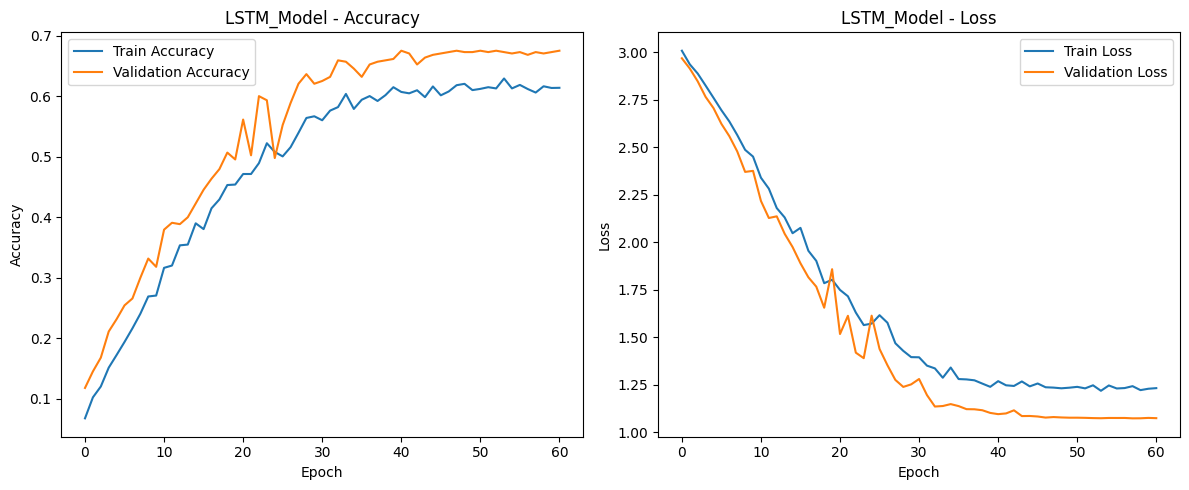

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Evaluation for LSTM_Model:
Accuracy: 0.8700
Precision: 0.8823
Recall: 0.8700
F1-score: 0.8593


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


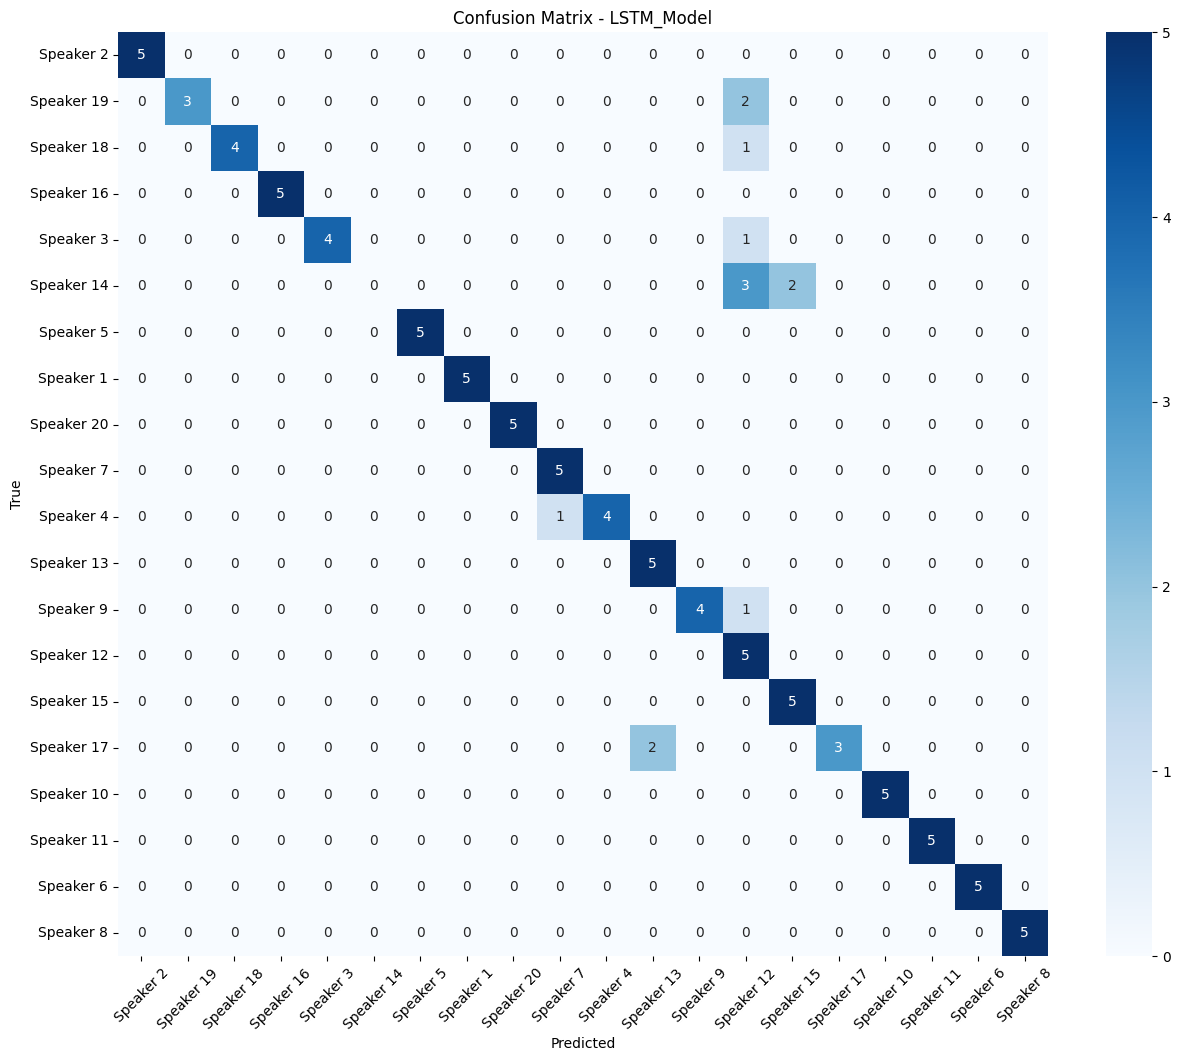

Model saved to: /content/drive/MyDrive/SLP/Model/LSTM_Model.h5


In [ ]:
# LSTM Model
lstm_model, lstm_history, lstm_test_accuracy = train_and_evaluate_model(
    build_lstm_model, "LSTM_Model",
    X_train, y_train_int, X_val, y_val_int, label_to_index
)

# CNN-LSTM


CNN_LSTM_Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 500, 13, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 500, 13, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 250, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 250, 6, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 125, 3, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 3, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 62, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,124 (1.06 MB)

 Trainable params: 279,124 (1.06 MB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.0584 - loss: 3.0005

124/124 ━━━━━━━━━━━━━━━━━━━━ 66s 473ms/step - accuracy: 0.0584 - loss: 3.0005 - val_accuracy: 0.0818 - val_loss: 2.9819 - learning_rate: 1.0000e-04
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.0755 - loss: 2.9838

124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 459ms/step - accuracy: 0.0756 - loss: 2.9838 - val_accuracy: 0.1500 - val_loss: 2.9446 - learning_rate: 1.0000e-04
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.1084 - loss: 2.9269 - val_accuracy: 0.1500 - val_loss: 2.7701 - learning_rate: 1.0000e-04
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.1502 - loss: 2.7809

124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 444ms/step - accuracy: 0.1503 - loss: 2.7805 - val_accuracy: 0.2273 - val_loss: 2.5321 - learning_rate: 1.0000e-04
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.2276 - loss: 2.5692

124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 462ms/step - accuracy: 0.2275 - loss: 2.5690 - val_accuracy: 0.3250 - val_loss: 2.3044 - learning_rate: 1.0000e-04
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.2647 - loss: 2.3929

124/124 ━━━━━━━━━━━━━━━━━━━━ 79s 441ms/step - accuracy: 0.2647 - loss: 2.3927 - val_accuracy: 0.3750 - val_loss: 2.0667 - learning_rate: 1.0000e-04
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.2958 - loss: 2.2507

124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 444ms/step - accuracy: 0.2958 - loss: 2.2505 - val_accuracy: 0.4295 - val_loss: 1.8848 - learning_rate: 1.0000e-04
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.3154 - loss: 2.1477

124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 440ms/step - accuracy: 0.3156 - loss: 2.1473 - val_accuracy: 0.4818 - val_loss: 1.7326 - learning_rate: 1.0000e-04
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 441ms/step - accuracy: 0.3637 - loss: 2.0240 - val_accuracy: 0.4386 - val_loss: 1.7371 - learning_rate: 1.0000e-04
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.3885 - loss: 1.9122

124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 455ms/step - accuracy: 0.3885 - loss: 1.9119 - val_accuracy: 0.5614 - val_loss: 1.4797 - learning_rate: 1.0000e-04
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 439ms/step - accuracy: 0.4231 - loss: 1.8013 - val_accuracy: 0.5386 - val_loss: 1.4591 - learning_rate: 1.0000e-04
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4505 - loss: 1.6826

124/124 ━━━━━━━━━━━━━━━━━━━━ 86s 473ms/step - accuracy: 0.4505 - loss: 1.6825 - val_accuracy: 0.6295 - val_loss: 1.2760 - learning_rate: 1.0000e-04
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.4812 - loss: 1.5923

124/124 ━━━━━━━━━━━━━━━━━━━━ 79s 445ms/step - accuracy: 0.4811 - loss: 1.5924 - val_accuracy: 0.6455 - val_loss: 1.2465 - learning_rate: 1.0000e-04
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.4962 - loss: 1.5378 - val_accuracy: 0.6318 - val_loss: 1.2417 - learning_rate: 1.0000e-04
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5250 - loss: 1.4622

124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 450ms/step - accuracy: 0.5251 - loss: 1.4620 - val_accuracy: 0.6591 - val_loss: 1.1165 - learning_rate: 1.0000e-04
Epoch 16/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.5432 - loss: 1.4194

124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 463ms/step - accuracy: 0.5432 - loss: 1.4192 - val_accuracy: 0.6750 - val_loss: 1.0369 - learning_rate: 1.0000e-04
Epoch 17/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5552 - loss: 1.3880

124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 444ms/step - accuracy: 0.5553 - loss: 1.3878 - val_accuracy: 0.6773 - val_loss: 0.9993 - learning_rate: 1.0000e-04
Epoch 18/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5683 - loss: 1.3272

124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 456ms/step - accuracy: 0.5684 - loss: 1.3270 - val_accuracy: 0.7114 - val_loss: 0.9858 - learning_rate: 1.0000e-04
Epoch 19/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5566 - loss: 1.3126

124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 458ms/step - accuracy: 0.5567 - loss: 1.3124 - val_accuracy: 0.7432 - val_loss: 0.8972 - learning_rate: 1.0000e-04
Epoch 20/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6205 - loss: 1.1822

124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 447ms/step - accuracy: 0.6204 - loss: 1.1823 - val_accuracy: 0.7682 - val_loss: 0.8403 - learning_rate: 1.0000e-04
Epoch 21/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 438ms/step - accuracy: 0.6143 - loss: 1.1595 - val_accuracy: 0.7432 - val_loss: 0.8607 - learning_rate: 1.0000e-04
Epoch 22/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 449ms/step - accuracy: 0.6200 - loss: 1.1632 - val_accuracy: 0.7568 - val_loss: 0.8393 - learning_rate: 1.0000e-04
Epoch 23/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.6520 - loss: 1.0583

124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 455ms/step - accuracy: 0.6519 - loss: 1.0586 - val_accuracy: 0.7818 - val_loss: 0.7649 - learning_rate: 1.0000e-04
Epoch 24/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.6427 - loss: 1.0855

124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 446ms/step - accuracy: 0.6427 - loss: 1.0856 - val_accuracy: 0.7886 - val_loss: 0.7257 - learning_rate: 1.0000e-04
Epoch 25/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.6764 - loss: 1.0234

124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 444ms/step - accuracy: 0.6764 - loss: 1.0236 - val_accuracy: 0.8023 - val_loss: 0.7339 - learning_rate: 1.0000e-04
Epoch 26/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 452ms/step - accuracy: 0.6584 - loss: 1.0275 - val_accuracy: 0.7886 - val_loss: 0.7271 - learning_rate: 1.0000e-04
Epoch 27/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.6679 - loss: 0.9889

124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 444ms/step - accuracy: 0.6679 - loss: 0.9891 - val_accuracy: 0.8159 - val_loss: 0.6588 - learning_rate: 1.0000e-04
Epoch 28/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 433ms/step - accuracy: 0.6863 - loss: 0.9652 - val_accuracy: 0.8000 - val_loss: 0.6836 - learning_rate: 1.0000e-04
Epoch 29/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 445ms/step - accuracy: 0.7027 - loss: 0.9166 - val_accuracy: 0.8068 - val_loss: 0.6544 - learning_rate: 1.0000e-04
Epoch 30/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.7233 - loss: 0.8935

124/124 ━━━━━━━━━━━━━━━━━━━━ 86s 478ms/step - accuracy: 0.7232 - loss: 0.8937 - val_accuracy: 0.8318 - val_loss: 0.6201 - learning_rate: 1.0000e-04
Epoch 31/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 77s 438ms/step - accuracy: 0.7077 - loss: 0.8865 - val_accuracy: 0.8318 - val_loss: 0.5865 - learning_rate: 1.0000e-04
Epoch 32/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 441ms/step - accuracy: 0.7287 - loss: 0.8817 - val_accuracy: 0.8159 - val_loss: 0.6398 - learning_rate: 1.0000e-04
Epoch 33/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 450ms/step - accuracy: 0.7271 - loss: 0.8654 - val_accuracy: 0.8091 - val_loss: 0.6178 - learning_rate: 1.0000e-04
Epoch 34/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7422 - loss: 0.8082

124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 442ms/step - accuracy: 0.7421 - loss: 0.8082 - val_accuracy: 0.8364 - val_loss: 0.5438 - learning_rate: 5.0000e-05
Epoch 35/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 447ms/step - accuracy: 0.7406 - loss: 0.7759 - val_accuracy: 0.8295 - val_loss: 0.5269 - learning_rate: 5.0000e-05
Epoch 36/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7523 - loss: 0.7871

124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 443ms/step - accuracy: 0.7523 - loss: 0.7871 - val_accuracy: 0.8500 - val_loss: 0.5216 - learning_rate: 5.0000e-05
Epoch 37/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 456ms/step - accuracy: 0.7516 - loss: 0.7820 - val_accuracy: 0.8432 - val_loss: 0.5366 - learning_rate: 5.0000e-05
Epoch 38/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7601 - loss: 0.7704

124/124 ━━━━━━━━━━━━━━━━━━━━ 90s 518ms/step - accuracy: 0.7601 - loss: 0.7703 - val_accuracy: 0.8523 - val_loss: 0.4986 - learning_rate: 5.0000e-05
Epoch 39/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 91s 592ms/step - accuracy: 0.7655 - loss: 0.7630 - val_accuracy: 0.8477 - val_loss: 0.5326 - learning_rate: 5.0000e-05
Epoch 40/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.7559 - loss: 0.7511

124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 608ms/step - accuracy: 0.7560 - loss: 0.7510 - val_accuracy: 0.8591 - val_loss: 0.4967 - learning_rate: 5.0000e-05
Epoch 41/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7802 - loss: 0.7302

124/124 ━━━━━━━━━━━━━━━━━━━━ 62s 443ms/step - accuracy: 0.7802 - loss: 0.7301 - val_accuracy: 0.8659 - val_loss: 0.4859 - learning_rate: 5.0000e-05
Epoch 42/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 60s 483ms/step - accuracy: 0.7868 - loss: 0.7120 - val_accuracy: 0.8659 - val_loss: 0.4657 - learning_rate: 5.0000e-05
Epoch 43/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 92s 562ms/step - accuracy: 0.7700 - loss: 0.7141 - val_accuracy: 0.8477 - val_loss: 0.4928 - learning_rate: 5.0000e-05
Epoch 44/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.7782 - loss: 0.7183

124/124 ━━━━━━━━━━━━━━━━━━━━ 121s 875ms/step - accuracy: 0.7782 - loss: 0.7182 - val_accuracy: 0.8705 - val_loss: 0.4446 - learning_rate: 5.0000e-05
Epoch 45/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 100s 539ms/step - accuracy: 0.7889 - loss: 0.6960 - val_accuracy: 0.8545 - val_loss: 0.4786 - learning_rate: 5.0000e-05
Epoch 46/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 74s 475ms/step - accuracy: 0.7871 - loss: 0.6641 - val_accuracy: 0.8682 - val_loss: 0.4365 - learning_rate: 5.0000e-05
Epoch 47/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7951 - loss: 0.6641

124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 459ms/step - accuracy: 0.7951 - loss: 0.6641 - val_accuracy: 0.8750 - val_loss: 0.4412 - learning_rate: 5.0000e-05
Epoch 48/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 440ms/step - accuracy: 0.8023 - loss: 0.6464 - val_accuracy: 0.8727 - val_loss: 0.4340 - learning_rate: 5.0000e-05
Epoch 49/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8082 - loss: 0.6222

124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 447ms/step - accuracy: 0.8081 - loss: 0.6225 - val_accuracy: 0.8886 - val_loss: 0.3921 - learning_rate: 5.0000e-05
Epoch 50/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 454ms/step - accuracy: 0.7973 - loss: 0.6618 - val_accuracy: 0.8614 - val_loss: 0.4397 - learning_rate: 5.0000e-05
Epoch 51/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 437ms/step - accuracy: 0.8069 - loss: 0.6379 - val_accuracy: 0.8750 - val_loss: 0.4007 - learning_rate: 5.0000e-05
Epoch 52/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8051 - loss: 0.6286

124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 458ms/step - accuracy: 0.8051 - loss: 0.6285 - val_accuracy: 0.8909 - val_loss: 0.3911 - learning_rate: 5.0000e-05
Epoch 53/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 438ms/step - accuracy: 0.8138 - loss: 0.6277 - val_accuracy: 0.8886 - val_loss: 0.3706 - learning_rate: 5.0000e-05
Epoch 54/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8284 - loss: 0.5846

124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 444ms/step - accuracy: 0.8283 - loss: 0.5847 - val_accuracy: 0.8955 - val_loss: 0.3723 - learning_rate: 5.0000e-05
Epoch 55/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 436ms/step - accuracy: 0.8261 - loss: 0.5737 - val_accuracy: 0.8818 - val_loss: 0.3919 - learning_rate: 5.0000e-05
Epoch 56/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 438ms/step - accuracy: 0.8226 - loss: 0.5744 - val_accuracy: 0.8773 - val_loss: 0.3963 - learning_rate: 5.0000e-05
Epoch 57/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 438ms/step - accuracy: 0.8275 - loss: 0.5864 - val_accuracy: 0.8955 - val_loss: 0.3567 - learning_rate: 5.0000e-05
Epoch 58/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 450ms/step - accuracy: 0.8358 - loss: 0.5498 - val_accuracy: 0.8909 - val_loss: 0.3543 - learning_rate: 2.5000e-05
Epoch 59/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8275 - loss: 0.5619

124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 445ms/step - accuracy: 0.8275 - loss: 0.5619 - val_accuracy: 0.8977 - val_loss: 0.3445 - learning_rate: 2.5000e-05
Epoch 60/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 444ms/step - accuracy: 0.8151 - loss: 0.5747 - val_accuracy: 0.8886 - val_loss: 0.3492 - learning_rate: 2.5000e-05
Epoch 61/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 437ms/step - accuracy: 0.8361 - loss: 0.5687 - val_accuracy: 0.8909 - val_loss: 0.3521 - learning_rate: 2.5000e-05
Epoch 62/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 454ms/step - accuracy: 0.8404 - loss: 0.5303 - val_accuracy: 0.8955 - val_loss: 0.3581 - learning_rate: 2.5000e-05
Epoch 63/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 439ms/step - accuracy: 0.8370 - loss: 0.5324 - val_accuracy: 0.8932 - val_loss: 0.3436 - learning_rate: 1.2500e-05
Epoch 64/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 435ms/step - accuracy: 0.8298 - loss: 0.5574 - val_accuracy: 0.8955 - val_loss: 0.3490 - learning_rate: 1.2500e-05
Epoch 65/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 4

124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 445ms/step - accuracy: 0.8286 - loss: 0.5367 - val_accuracy: 0.9023 - val_loss: 0.3362 - learning_rate: 6.2500e-06
Epoch 69/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.8271 - loss: 0.5358 - val_accuracy: 0.8977 - val_loss: 0.3354 - learning_rate: 6.2500e-06
Epoch 70/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 57s 463ms/step - accuracy: 0.8434 - loss: 0.5150 - val_accuracy: 0.8955 - val_loss: 0.3324 - learning_rate: 6.2500e-06
Epoch 71/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 79s 442ms/step - accuracy: 0.8386 - loss: 0.5221 - val_accuracy: 0.8909 - val_loss: 0.3338 - learning_rate: 6.2500e-06
Epoch 72/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.8420 - loss: 0.5348 - val_accuracy: 0.9000 - val_loss: 0.3330 - learning_rate: 3.1250e-06
Epoch 73/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 54s 438ms/step - accuracy: 0.8549 - loss: 0.4951 - val_accuracy: 0.8977 - val_loss: 0.3315 - learning_rate: 3.1250e-06
Epoch 74/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 4

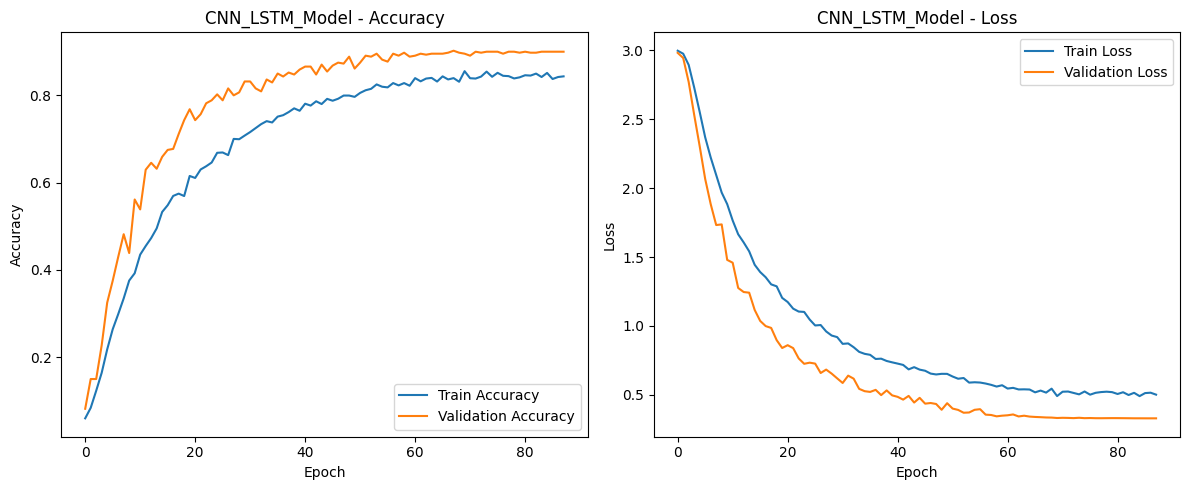

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step

Evaluation for CNN_LSTM_Model:
Accuracy: 0.9700
Precision: 0.9774
Recall: 0.9700
F1-score: 0.9691


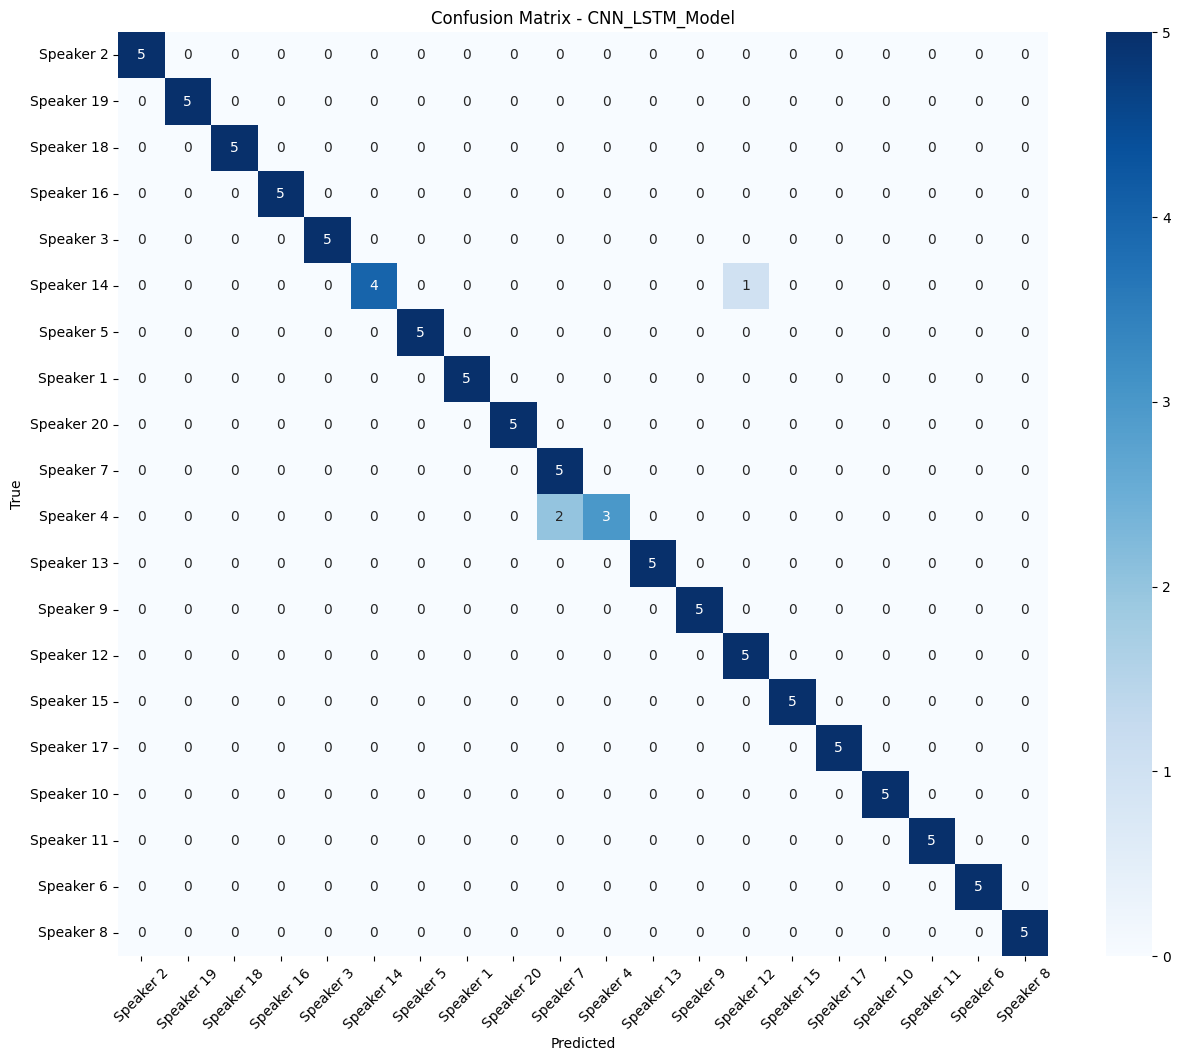

Model saved to: /content/drive/MyDrive/SLP/Model/CNN_LSTM_Model.h5


In [ ]:
# CNN-LSTM Model
cnn_lstm_model, cnn_lstm_history, cnn_lstm_test_accuracy = train_and_evaluate_model(
    build_cnn_lstm_model, "CNN_LSTM_Model",
    X_train, y_train_int, X_val, y_val_int, label_to_index
)

# Transformer

In [ ]:
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            keras.layers.Dense(ff_dim, activation="relu"),
            keras.layers.Dense(embed_dim),
        ])
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(rate)
        self.dropout2 = keras.layers.Dropout(rate)

    def call(self, inputs):
        # Thay đổi cách gọi để không yêu cầu tham số training
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
def build_transformer_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape)

    # Thêm Positional Embedding nếu cần
    x = keras.layers.Dense(64, activation="relu")(inputs)

    # Sử dụng TransformerBlock mới
    x = TransformerBlock(64, 4, 128)(x)
    x = keras.layers.GlobalAveragePooling1D()(x)

    # Classification head
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    model = keras.models.Model(inputs=inputs, outputs=outputs)

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


Transformer_Model Summary:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 500, 13)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500, 64)             │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 500, 64)             │          83,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,996 (371.08 KB)

 Trainable params: 94,996 (371.08 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0637 - loss: 3.0995

124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.0638 - loss: 3.0987 - val_accuracy: 0.1568 - val_loss: 2.8287 - learning_rate: 1.0000e-04
Epoch 2/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1529 - loss: 2.8039

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1533 - loss: 2.8031 - val_accuracy: 0.3000 - val_loss: 2.6247 - learning_rate: 1.0000e-04
Epoch 3/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2362 - loss: 2.5917

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2366 - loss: 2.5907 - val_accuracy: 0.3591 - val_loss: 2.4058 - learning_rate: 1.0000e-04
Epoch 4/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2899 - loss: 2.3893

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2904 - loss: 2.3882 - val_accuracy: 0.4455 - val_loss: 2.1646 - learning_rate: 1.0000e-04
Epoch 5/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3504 - loss: 2.1804

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3510 - loss: 2.1793 - val_accuracy: 0.5295 - val_loss: 1.8921 - learning_rate: 1.0000e-04
Epoch 6/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4531 - loss: 1.8948

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4538 - loss: 1.8930 - val_accuracy: 0.6114 - val_loss: 1.5674 - learning_rate: 1.0000e-04
Epoch 7/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5395 - loss: 1.5935

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5399 - loss: 1.5924 - val_accuracy: 0.7250 - val_loss: 1.3157 - learning_rate: 1.0000e-04
Epoch 8/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6097 - loss: 1.4017

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6097 - loss: 1.4005 - val_accuracy: 0.7364 - val_loss: 1.1303 - learning_rate: 1.0000e-04
Epoch 9/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6382 - loss: 1.2230

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6385 - loss: 1.2224 - val_accuracy: 0.7636 - val_loss: 0.9775 - learning_rate: 1.0000e-04
Epoch 10/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6948 - loss: 1.0833

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6949 - loss: 1.0826 - val_accuracy: 0.8091 - val_loss: 0.8525 - learning_rate: 1.0000e-04
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7169 - loss: 0.9671

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7170 - loss: 0.9667 - val_accuracy: 0.8432 - val_loss: 0.7480 - learning_rate: 1.0000e-04
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7515 - loss: 0.8613 - val_accuracy: 0.8364 - val_loss: 0.6696 - learning_rate: 1.0000e-04
Epoch 13/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7912 - loss: 0.7609

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7913 - loss: 0.7606 - val_accuracy: 0.8568 - val_loss: 0.6068 - learning_rate: 1.0000e-04
Epoch 14/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8022 - loss: 0.7071

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8024 - loss: 0.7066 - val_accuracy: 0.8682 - val_loss: 0.5599 - learning_rate: 1.0000e-04
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8145 - loss: 0.6472 - val_accuracy: 0.8614 - val_loss: 0.5191 - learning_rate: 1.0000e-04
Epoch 16/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8451 - loss: 0.5638

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8450 - loss: 0.5639 - val_accuracy: 0.8750 - val_loss: 0.4806 - learning_rate: 1.0000e-04
Epoch 17/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8431 - loss: 0.5564

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8432 - loss: 0.5562 - val_accuracy: 0.8841 - val_loss: 0.4545 - learning_rate: 1.0000e-04
Epoch 18/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8537 - loss: 0.5064

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8537 - loss: 0.5062 - val_accuracy: 0.9045 - val_loss: 0.4048 - learning_rate: 1.0000e-04
Epoch 19/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8624 - loss: 0.4783

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8625 - loss: 0.4781 - val_accuracy: 0.9091 - val_loss: 0.3944 - learning_rate: 1.0000e-04
Epoch 20/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8779 - loss: 0.4206 - val_accuracy: 0.8955 - val_loss: 0.3824 - learning_rate: 1.0000e-04
Epoch 21/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8813 - loss: 0.4082 - val_accuracy: 0.9023 - val_loss: 0.3578 - learning_rate: 1.0000e-04
Epoch 22/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8802 - loss: 0.4039

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8806 - loss: 0.4033 - val_accuracy: 0.9227 - val_loss: 0.3380 - learning_rate: 1.0000e-04
Epoch 23/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8885 - loss: 0.3777 - val_accuracy: 0.9136 - val_loss: 0.3454 - learning_rate: 1.0000e-04
Epoch 24/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9004 - loss: 0.3493 - val_accuracy: 0.9182 - val_loss: 0.3121 - learning_rate: 1.0000e-04
Epoch 25/100
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8982 - loss: 0.3361

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8983 - loss: 0.3360 - val_accuracy: 0.9318 - val_loss: 0.2934 - learning_rate: 1.0000e-04
Epoch 26/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9119 - loss: 0.3164

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9120 - loss: 0.3162 - val_accuracy: 0.9341 - val_loss: 0.2674 - learning_rate: 1.0000e-04
Epoch 27/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9195 - loss: 0.2899 - val_accuracy: 0.9227 - val_loss: 0.2745 - learning_rate: 1.0000e-04
Epoch 28/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9194 - loss: 0.2815

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9194 - loss: 0.2816 - val_accuracy: 0.9386 - val_loss: 0.2676 - learning_rate: 1.0000e-04
Epoch 29/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9173 - loss: 0.2751 - val_accuracy: 0.9386 - val_loss: 0.2699 - learning_rate: 1.0000e-04
Epoch 30/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9063 - loss: 0.2784 - val_accuracy: 0.9295 - val_loss: 0.2668 - learning_rate: 1.0000e-04
Epoch 31/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9243 - loss: 0.2492 - val_accuracy: 0.9159 - val_loss: 0.2827 - learning_rate: 1.0000e-04
Epoch 32/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9282 - loss: 0.2406

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9283 - loss: 0.2404 - val_accuracy: 0.9455 - val_loss: 0.2344 - learning_rate: 5.0000e-05
Epoch 33/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9378 - loss: 0.2222 - val_accuracy: 0.9432 - val_loss: 0.2306 - learning_rate: 5.0000e-05
Epoch 34/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9363 - loss: 0.2179 - val_accuracy: 0.9432 - val_loss: 0.2201 - learning_rate: 5.0000e-05
Epoch 35/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9490 - loss: 0.2022 - val_accuracy: 0.9455 - val_loss: 0.2307 - learning_rate: 5.0000e-05
Epoch 36/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9396 - loss: 0.2138

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9396 - loss: 0.2137 - val_accuracy: 0.9500 - val_loss: 0.2154 - learning_rate: 2.5000e-05
Epoch 37/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9389 - loss: 0.2168

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9390 - loss: 0.2165 - val_accuracy: 0.9523 - val_loss: 0.2163 - learning_rate: 2.5000e-05
Epoch 38/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9461 - loss: 0.2064

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9460 - loss: 0.2064 - val_accuracy: 0.9545 - val_loss: 0.2094 - learning_rate: 2.5000e-05
Epoch 39/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9374 - loss: 0.2042 - val_accuracy: 0.9477 - val_loss: 0.2200 - learning_rate: 2.5000e-05
Epoch 40/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9427 - loss: 0.2054 - val_accuracy: 0.9500 - val_loss: 0.2082 - learning_rate: 2.5000e-05
Epoch 41/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9346 - loss: 0.2086 - val_accuracy: 0.9432 - val_loss: 0.2155 - learning_rate: 2.5000e-05
Epoch 42/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9447 - loss: 0.2041 - val_accuracy: 0.9523 - val_loss: 0.2122 - learning_rate: 1.2500e-05
Epoch 43/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9422 - loss: 0.1945 - val_accuracy: 0.9500 - val_loss: 0.2085 - learning_rate: 1.2500e-05
Epoch 44/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - ac

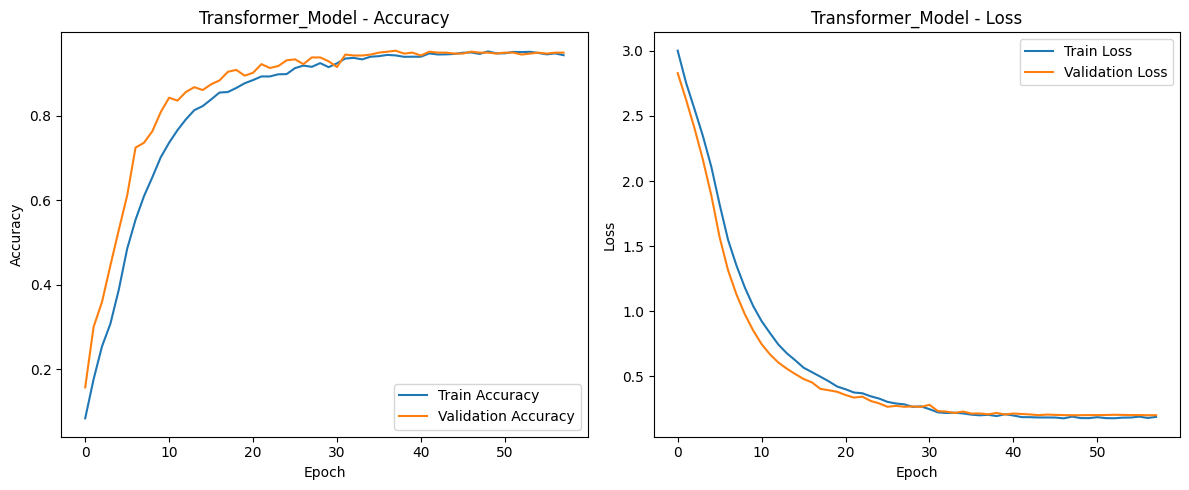

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step

Evaluation for Transformer_Model:
Accuracy: 0.9700
Precision: 0.9750
Recall: 0.9700
F1-score: 0.9683


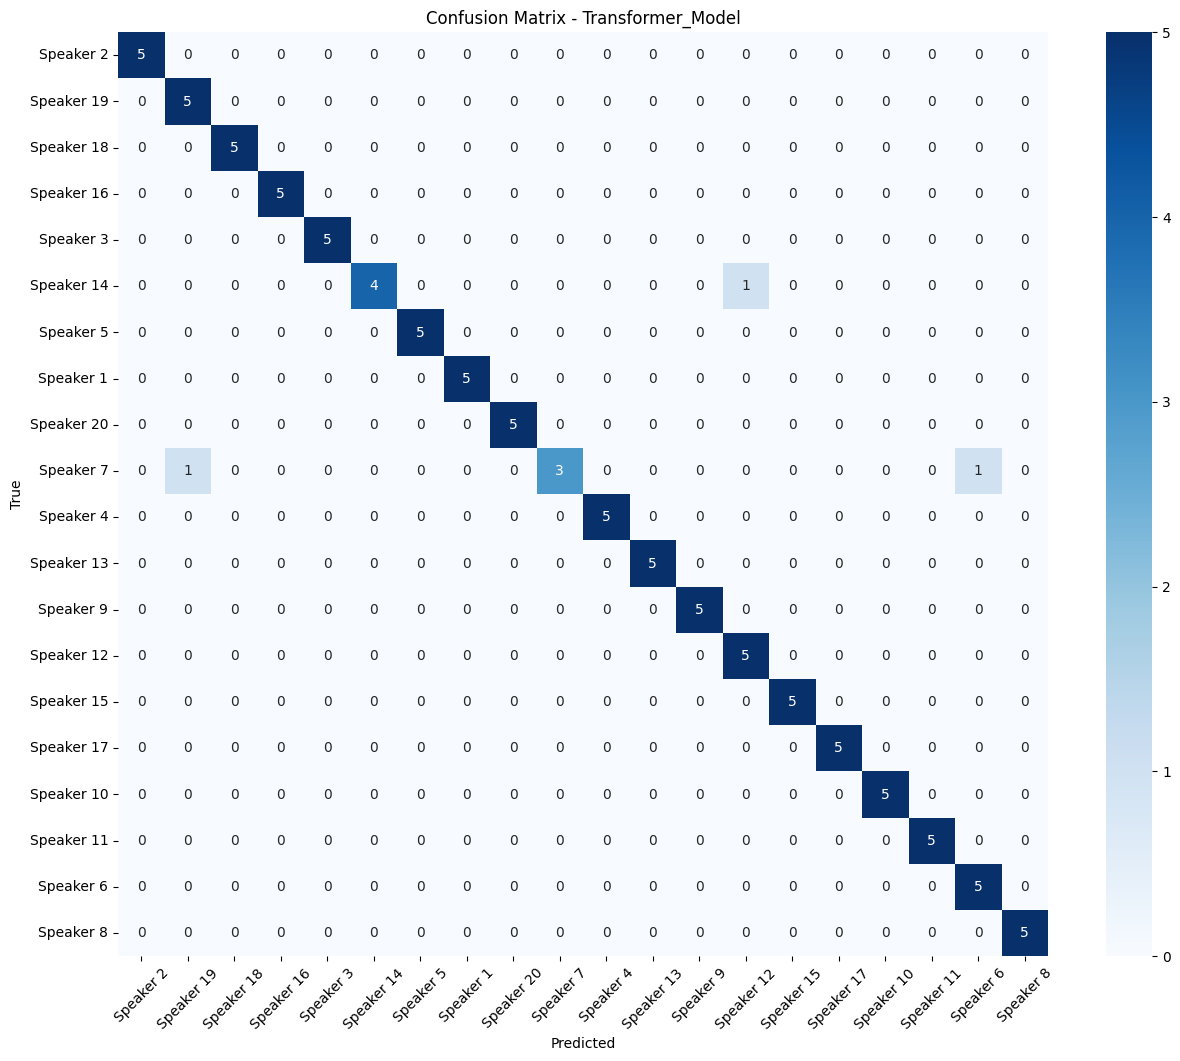

Model saved to: /content/drive/MyDrive/SLP/Model/Transformer_Model.h5


In [ ]:
# Tạo và train model
transformer_model, transformer_history, transformer_test_accuracy = train_and_evaluate_model(
    build_transformer_model, "Transformer_Model",
    X_train, y_train_int, X_val, y_val_int, label_to_index
)

# LSTM + Multi-Head Attention Version 2

In [ ]:
def build_lstm_multihead_attention(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape)

    # LSTM layer
    lstm_out = keras.layers.LSTM(128, return_sequences=True)(inputs)

    # Multi-Head Attention
    attn_out = keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(lstm_out, lstm_out)

    # Concatenate LSTM and Attention outputs
    concat = keras.layers.Concatenate()([lstm_out, attn_out])

    # Global Average Pooling
    gap = keras.layers.GlobalAveragePooling1D()(concat)

    # Dense layers
    x = keras.layers.Dense(128, activation='relu')(gap)
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(0.0001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model


Model Summary:


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 500, 13)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 500, 128)       │         72,704 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 500, 128)       │        131,968 │ lstm_11[0][0],         │
│ (MultiHeadAttention)      │                        │                │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 500, 256)       │              0 │ lstm_11[0][0],         │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 256)            │              0 │ concatenate[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 128)            │         32,896 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_83 (Dropout)      │ (None, 128)            │              0 │ dense_32[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 20)             │          2,580 │ dropout_83[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 240,148 (938.08 KB)

 Trainable params: 240,148 (938.08 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0670 - loss: 2.9841

124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.0671 - loss: 2.9838 - val_accuracy: 0.1455 - val_loss: 2.8783 - learning_rate: 1.0000e-04
Epoch 2/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1656 - loss: 2.8035

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.1657 - loss: 2.8024 - val_accuracy: 0.2568 - val_loss: 2.5117 - learning_rate: 1.0000e-04
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2635 - loss: 2.3869

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2637 - loss: 2.3860 - val_accuracy: 0.4364 - val_loss: 1.9584 - learning_rate: 1.0000e-04
Epoch 4/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4009 - loss: 1.8781

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.4010 - loss: 1.8765 - val_accuracy: 0.5864 - val_loss: 1.4578 - learning_rate: 1.0000e-04
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4885 - loss: 1.4640

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.4886 - loss: 1.4637 - val_accuracy: 0.6409 - val_loss: 1.1733 - learning_rate: 1.0000e-04
Epoch 6/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5828 - loss: 1.2183

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5829 - loss: 1.2177 - val_accuracy: 0.7000 - val_loss: 0.9723 - learning_rate: 1.0000e-04
Epoch 7/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6391 - loss: 1.0398

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6392 - loss: 1.0395 - val_accuracy: 0.7364 - val_loss: 0.8362 - learning_rate: 1.0000e-04
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6685 - loss: 0.9368

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6686 - loss: 0.9366 - val_accuracy: 0.7614 - val_loss: 0.7507 - learning_rate: 1.0000e-04
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6928 - loss: 0.8732

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6929 - loss: 0.8728 - val_accuracy: 0.7682 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7289 - loss: 0.7745

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7289 - loss: 0.7744 - val_accuracy: 0.8045 - val_loss: 0.6309 - learning_rate: 1.0000e-04
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7574 - loss: 0.6871 - val_accuracy: 0.7909 - val_loss: 0.5964 - learning_rate: 1.0000e-04
Epoch 12/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7662 - loss: 0.6620

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7662 - loss: 0.6617 - val_accuracy: 0.8114 - val_loss: 0.5730 - learning_rate: 1.0000e-04
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7736 - loss: 0.6250 - val_accuracy: 0.8000 - val_loss: 0.5645 - learning_rate: 1.0000e-04
Epoch 14/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7964 - loss: 0.5875

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.7964 - loss: 0.5874 - val_accuracy: 0.8205 - val_loss: 0.5525 - learning_rate: 1.0000e-04
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8061 - loss: 0.5465

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8060 - loss: 0.5466 - val_accuracy: 0.8386 - val_loss: 0.4749 - learning_rate: 1.0000e-04
Epoch 16/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8035 - loss: 0.5595

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8036 - loss: 0.5593 - val_accuracy: 0.8432 - val_loss: 0.4645 - learning_rate: 1.0000e-04
Epoch 17/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8139 - loss: 0.5094

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8139 - loss: 0.5093 - val_accuracy: 0.8500 - val_loss: 0.4528 - learning_rate: 1.0000e-04
Epoch 18/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8337 - loss: 0.4768 - val_accuracy: 0.8409 - val_loss: 0.4709 - learning_rate: 1.0000e-04
Epoch 19/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8387 - loss: 0.4808

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.8387 - loss: 0.4804 - val_accuracy: 0.8614 - val_loss: 0.4250 - learning_rate: 1.0000e-04
Epoch 20/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8368 - loss: 0.4528 - val_accuracy: 0.8568 - val_loss: 0.4150 - learning_rate: 1.0000e-04
Epoch 21/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.8428 - loss: 0.4263 - val_accuracy: 0.8455 - val_loss: 0.4309 - learning_rate: 1.0000e-04
Epoch 22/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8597 - loss: 0.4048

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8597 - loss: 0.4049 - val_accuracy: 0.8750 - val_loss: 0.3792 - learning_rate: 1.0000e-04
Epoch 23/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8661 - loss: 0.3807 - val_accuracy: 0.8727 - val_loss: 0.3856 - learning_rate: 1.0000e-04
Epoch 24/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.8626 - loss: 0.3850 - val_accuracy: 0.8727 - val_loss: 0.3738 - learning_rate: 1.0000e-04
Epoch 25/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8869 - loss: 0.3247

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8867 - loss: 0.3250 - val_accuracy: 0.8818 - val_loss: 0.3487 - learning_rate: 1.0000e-04
Epoch 26/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8742 - loss: 0.3474

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8742 - loss: 0.3475 - val_accuracy: 0.8886 - val_loss: 0.3604 - learning_rate: 1.0000e-04
Epoch 27/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8933 - loss: 0.3291 - val_accuracy: 0.8795 - val_loss: 0.3386 - learning_rate: 1.0000e-04
Epoch 28/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8904 - loss: 0.3261

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8904 - loss: 0.3261 - val_accuracy: 0.9023 - val_loss: 0.2972 - learning_rate: 1.0000e-04
Epoch 29/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9050 - loss: 0.2869 - val_accuracy: 0.8841 - val_loss: 0.3158 - learning_rate: 1.0000e-04
Epoch 30/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9077 - loss: 0.2849 - val_accuracy: 0.8932 - val_loss: 0.3052 - learning_rate: 1.0000e-04
Epoch 31/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8929 - loss: 0.3011

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8930 - loss: 0.3009 - val_accuracy: 0.9045 - val_loss: 0.2968 - learning_rate: 1.0000e-04
Epoch 32/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9115 - loss: 0.2689 - val_accuracy: 0.9000 - val_loss: 0.2972 - learning_rate: 1.0000e-04
Epoch 33/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9087 - loss: 0.2558 - val_accuracy: 0.9023 - val_loss: 0.2805 - learning_rate: 1.0000e-04
Epoch 34/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9216 - loss: 0.2423 - val_accuracy: 0.9045 - val_loss: 0.2846 - learning_rate: 1.0000e-04
Epoch 35/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9218 - loss: 0.2287 - val_accuracy: 0.8977 - val_loss: 0.2901 - learning_rate: 5.0000e-05
Epoch 36/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9189 - loss: 0.2304 - val_accuracy: 0.9000 - val_loss: 0.2861 - learning_rate: 5.0000e-05
Epoch 37/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.9290 - loss: 0.2056 - val_accuracy: 0.9091 - val_loss: 0.2661 - learning_rate: 5.0000e-05
Epoch 38/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9239 - loss: 0.2182 - val_accuracy: 0.9091 - val_loss: 0.2609 - learning_rate: 5.0000e-05
Epoch 39/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9371 - loss: 0.1892

124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9370 - loss: 0.1893 - val_accuracy: 0.9114 - val_loss: 0.2502 - learning_rate: 5.0000e-05
Epoch 40/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9355 - loss: 0.1917

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9355 - loss: 0.1918 - val_accuracy: 0.9182 - val_loss: 0.2528 - learning_rate: 5.0000e-05
Epoch 41/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9332 - loss: 0.1979 - val_accuracy: 0.9023 - val_loss: 0.2600 - learning_rate: 5.0000e-05
Epoch 42/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9393 - loss: 0.1786 - val_accuracy: 0.9136 - val_loss: 0.2451 - learning_rate: 5.0000e-05
Epoch 43/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9414 - loss: 0.1736 - val_accuracy: 0.9068 - val_loss: 0.2510 - learning_rate: 5.0000e-05
Epoch 44/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9376 - loss: 0.1758 - val_accuracy: 0.9159 - val_loss: 0.2403 - learning_rate: 2.5000e-05
Epoch 45/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9530 - loss: 0.1491 - val_accuracy: 0.9182 - val_loss: 0.2421 - learning_rate: 2.5000e-05
Epoch 46/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step -

124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9506 - loss: 0.1479 - val_accuracy: 0.9205 - val_loss: 0.2351 - learning_rate: 1.2500e-05
Epoch 49/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9427 - loss: 0.1667 - val_accuracy: 0.9114 - val_loss: 0.2379 - learning_rate: 1.2500e-05
Epoch 50/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9421 - loss: 0.1663 - val_accuracy: 0.9159 - val_loss: 0.2337 - learning_rate: 1.2500e-05
Epoch 51/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9502 - loss: 0.1503 - val_accuracy: 0.9182 - val_loss: 0.2374 - learning_rate: 1.2500e-05
Epoch 52/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9463 - loss: 0.1525 - val_accuracy: 0.9159 - val_loss: 0.2387 - learning_rate: 6.2500e-06
Epoch 53/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9578 - loss: 0.1385 - val_accuracy: 0.9136 - val_loss: 0.2332 - learning_rate: 6.2500e-06
Epoch 54/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - a

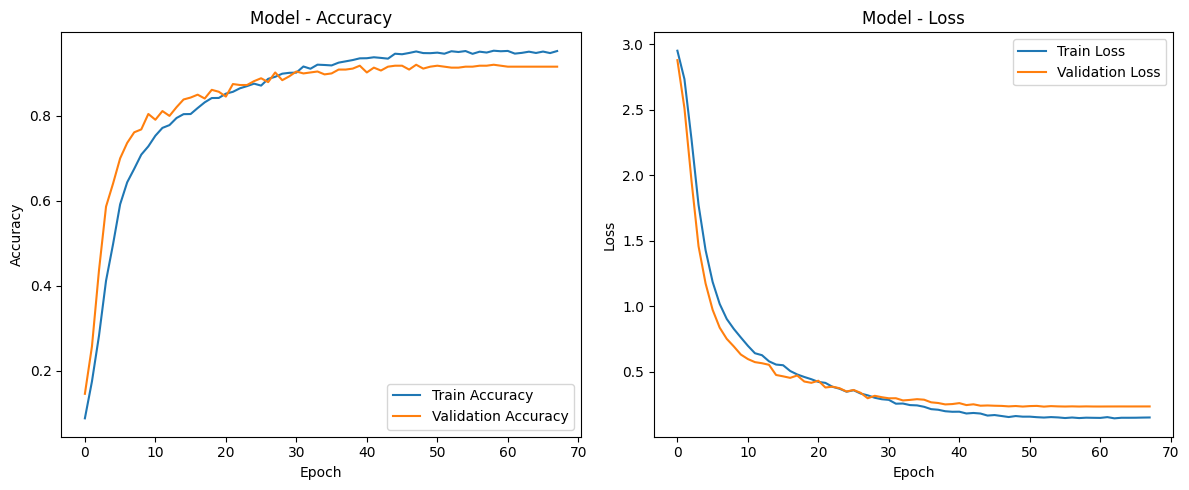

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Evaluation for Model:
Accuracy: 0.9700
Precision: 0.9750
Recall: 0.9700
F1-score: 0.9697


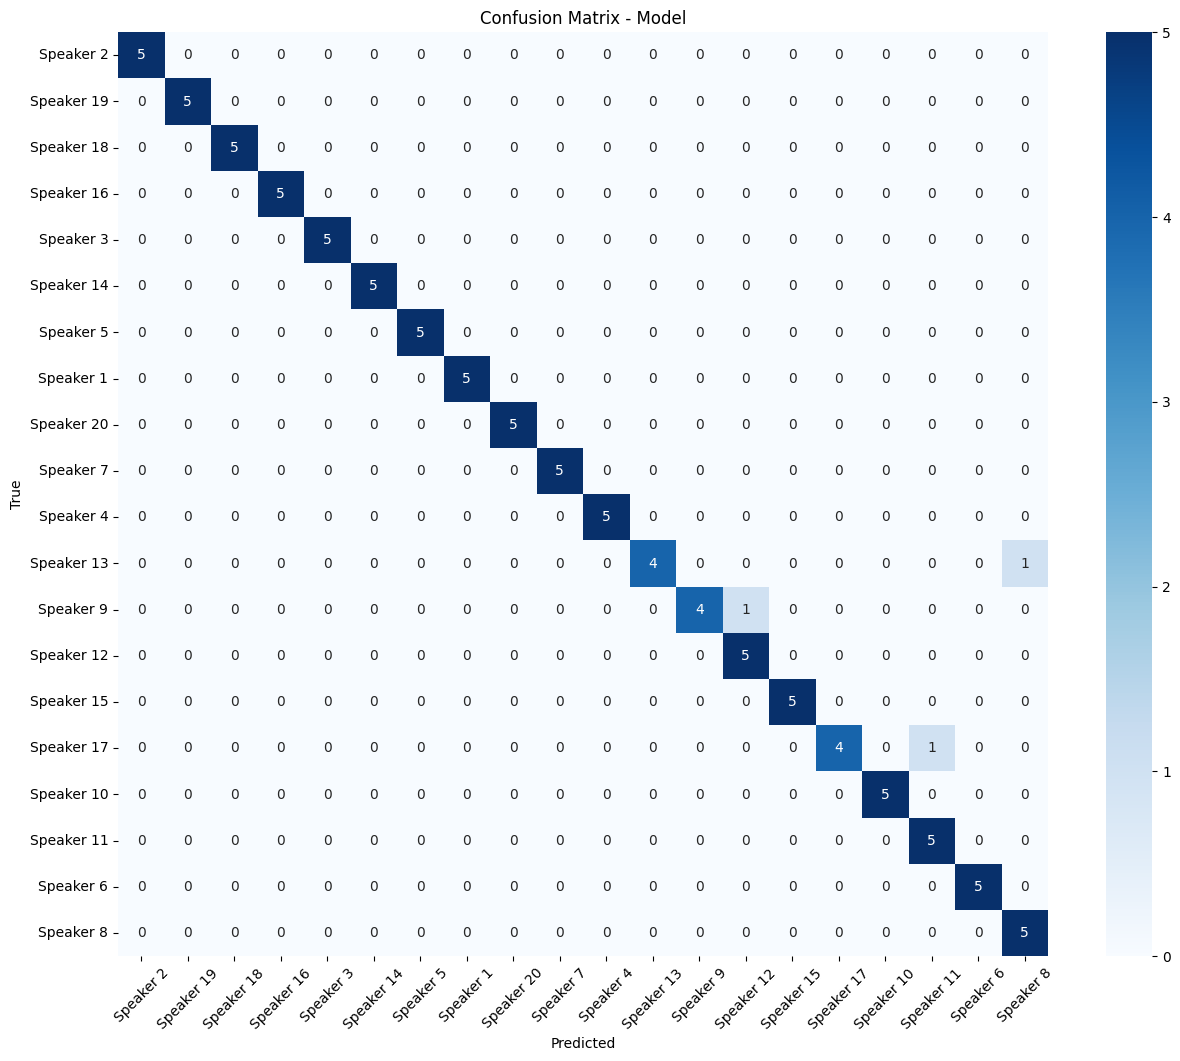

Model saved to: /content/drive/MyDrive/SLP/Model/Model.h5


In [ ]:
model, history, test_accuracy = train_and_evaluate_model(
    build_lstm_multihead_attention, "Model",
    X_train, y_train_int, X_val, y_val_int, label_to_index
)

# Feature Fusion Model

In [ ]:
def build_feature_fusion_model(input_shape, num_classes):
    # Input layer
    inputs = keras.layers.Input(shape=input_shape)

    # Branch 1 - LSTM
    lstm_branch = keras.layers.LSTM(128, return_sequences=True)(inputs)
    lstm_branch = keras.layers.LSTM(64)(lstm_branch)

    # Branch 2 - CNN
    cnn_branch = keras.layers.Reshape((input_shape[0], input_shape[1], 1))(inputs)
    cnn_branch = keras.layers.Conv2D(32, (3, 3), activation='relu')(cnn_branch)
    cnn_branch = keras.layers.MaxPooling2D((2, 2))(cnn_branch)
    cnn_branch = keras.layers.Conv2D(64, (3, 3), activation='relu')(cnn_branch)
    cnn_branch = keras.layers.GlobalAveragePooling2D()(cnn_branch)

    # Concatenate branches
    merged = keras.layers.Concatenate()([lstm_branch, cnn_branch])

    # Dense layers
    x = keras.layers.Dense(128, activation='relu')(merged)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(0.0001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model


Model Summary:


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 500, 13)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_5 (Reshape)       │ (None, 500, 13, 1)     │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 498, 11, 32)    │            320 │ reshape_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 249, 5, 32)     │              0 │ conv2d_8[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_12 (LSTM)            │ (None, 500, 128)       │         72,704 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 247, 3, 64)     │         18,496 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ (None, 64)             │         49,408 │ lstm_12[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 64)             │              0 │ conv2d_9[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ lstm_13[0][0],         │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 128)            │         16,512 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_84 (Dropout)      │ (None, 128)            │              0 │ dense_34[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 64)             │          8,256 │ dropout_84[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 20)             │          1,300 │ dense_35[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 166,996 (652.33 KB)

 Trainable params: 166,996 (652.33 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0553 - loss: 2.9950

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.0554 - loss: 2.9949 - val_accuracy: 0.0977 - val_loss: 2.9591 - learning_rate: 1.0000e-04
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0933 - loss: 2.9501

124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.0934 - loss: 2.9500 - val_accuracy: 0.1318 - val_loss: 2.8888 - learning_rate: 1.0000e-04
Epoch 3/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1208 - loss: 2.8717

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.1210 - loss: 2.8711 - val_accuracy: 0.1727 - val_loss: 2.7448 - learning_rate: 1.0000e-04
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1764 - loss: 2.7219

124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.1763 - loss: 2.7218 - val_accuracy: 0.2250 - val_loss: 2.5604 - learning_rate: 1.0000e-04
Epoch 5/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1897 - loss: 2.5689

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.1900 - loss: 2.5682 - val_accuracy: 0.2841 - val_loss: 2.4291 - learning_rate: 1.0000e-04
Epoch 6/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2623 - loss: 2.3817

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2623 - loss: 2.3809 - val_accuracy: 0.3159 - val_loss: 2.1736 - learning_rate: 1.0000e-04
Epoch 7/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2903 - loss: 2.2224

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2905 - loss: 2.2216 - val_accuracy: 0.3523 - val_loss: 2.0606 - learning_rate: 1.0000e-04
Epoch 8/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3186 - loss: 2.1768

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3186 - loss: 2.1762 - val_accuracy: 0.4227 - val_loss: 1.9273 - learning_rate: 1.0000e-04
Epoch 9/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3831 - loss: 1.9508

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3831 - loss: 1.9504 - val_accuracy: 0.4568 - val_loss: 1.7940 - learning_rate: 1.0000e-04
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4074 - loss: 1.8136

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.4074 - loss: 1.8135 - val_accuracy: 0.5114 - val_loss: 1.6317 - learning_rate: 1.0000e-04
Epoch 11/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4244 - loss: 1.7438

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4241 - loss: 1.7443 - val_accuracy: 0.5182 - val_loss: 1.6069 - learning_rate: 1.0000e-04
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4381 - loss: 1.7208 - val_accuracy: 0.4455 - val_loss: 1.6749 - learning_rate: 1.0000e-04
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4242 - loss: 1.7070

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.4244 - loss: 1.7066 - val_accuracy: 0.5273 - val_loss: 1.4793 - learning_rate: 1.0000e-04
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4745 - loss: 1.5919 - val_accuracy: 0.5000 - val_loss: 1.5700 - learning_rate: 1.0000e-04
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.4596 - loss: 1.6403 - val_accuracy: 0.5159 - val_loss: 1.4828 - learning_rate: 1.0000e-04
Epoch 16/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4722 - loss: 1.5755

124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.4725 - loss: 1.5746 - val_accuracy: 0.5568 - val_loss: 1.3794 - learning_rate: 1.0000e-04
Epoch 17/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5101 - loss: 1.4592 - val_accuracy: 0.5432 - val_loss: 1.4161 - learning_rate: 1.0000e-04
Epoch 18/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4919 - loss: 1.4547

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4922 - loss: 1.4541 - val_accuracy: 0.5727 - val_loss: 1.3100 - learning_rate: 1.0000e-04
Epoch 19/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5379 - loss: 1.3424 - val_accuracy: 0.5205 - val_loss: 1.4518 - learning_rate: 1.0000e-04
Epoch 20/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5193 - loss: 1.3732 - val_accuracy: 0.5500 - val_loss: 1.2602 - learning_rate: 1.0000e-04
Epoch 21/100
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5635 - loss: 1.2997

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5636 - loss: 1.2990 - val_accuracy: 0.6068 - val_loss: 1.2232 - learning_rate: 1.0000e-04
Epoch 22/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5430 - loss: 1.3352 - val_accuracy: 0.5659 - val_loss: 1.2773 - learning_rate: 1.0000e-04
Epoch 23/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5558 - loss: 1.3101 - val_accuracy: 0.5568 - val_loss: 1.3079 - learning_rate: 1.0000e-04
Epoch 24/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.5579 - loss: 1.3231 - val_accuracy: 0.5818 - val_loss: 1.2790 - learning_rate: 1.0000e-04
Epoch 25/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5608 - loss: 1.2993 - val_accuracy: 0.5977 - val_loss: 1.2143 - learning_rate: 5.0000e-05
Epoch 26/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5880 - loss: 1.2000 - val_accuracy: 0.5659 - val_loss: 1.2361 - learning_rate: 5.0000e-05
Epoch 27/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - ac

124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5935 - loss: 1.2005 - val_accuracy: 0.6091 - val_loss: 1.1640 - learning_rate: 1.2500e-05
Epoch 34/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5855 - loss: 1.1870 - val_accuracy: 0.6091 - val_loss: 1.1594 - learning_rate: 1.2500e-05
Epoch 35/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5948 - loss: 1.1695 - val_accuracy: 0.6023 - val_loss: 1.1543 - learning_rate: 1.2500e-05
Epoch 36/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5883 - loss: 1.1683 - val_accuracy: 0.6068 - val_loss: 1.1457 - learning_rate: 1.2500e-05
Epoch 37/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6164 - loss: 1.1149 - val_accuracy: 0.6045 - val_loss: 1.1392 - learning_rate: 6.2500e-06
Epoch 38/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5953 - loss: 1.1685 - val_accuracy: 0.6045 - val_loss: 1.1356 - learning_rate: 6.2500e-06
Epoch 39/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - ac

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6182 - loss: 1.1372 - val_accuracy: 0.6159 - val_loss: 1.1269 - learning_rate: 1.5625e-06
Epoch 46/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6033 - loss: 1.1417 - val_accuracy: 0.6114 - val_loss: 1.1244 - learning_rate: 1.5625e-06
Epoch 47/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6045 - loss: 1.1213 - val_accuracy: 0.6136 - val_loss: 1.1265 - learning_rate: 1.5625e-06
Epoch 48/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6108 - loss: 1.1116 - val_accuracy: 0.6136 - val_loss: 1.1244 - learning_rate: 1.5625e-06
Epoch 49/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6141 - loss: 1.1250 - val_accuracy: 0.6136 - val_loss: 1.1241 - learning_rate: 7.8125e-07
Epoch 50/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6144 - loss: 1.1464 - val_accuracy: 0.6136 - val_loss: 1.1234 - learning_rate: 7.8125e-07
Epoch 51/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - a

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6043 - loss: 1.1635 - val_accuracy: 0.6182 - val_loss: 1.1219 - learning_rate: 1.9531e-07
Epoch 56/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6260 - loss: 1.1110 - val_accuracy: 0.6182 - val_loss: 1.1218 - learning_rate: 1.9531e-07
Epoch 57/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6022 - loss: 1.1170 - val_accuracy: 0.6182 - val_loss: 1.1216 - learning_rate: 1.9531e-07
Epoch 58/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6190 - loss: 1.1164 - val_accuracy: 0.6159 - val_loss: 1.1215 - learning_rate: 1.9531e-07
Epoch 59/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.6114 - loss: 1.1278 - val_accuracy: 0.6159 - val_loss: 1.1212 - learning_rate: 1.0000e-07
Epoch 60/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6129 - loss: 1.1400 - val_accuracy: 0.6159 - val_loss: 1.1211 - learning_rate: 1.0000e-07
Epoch 61/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - ac

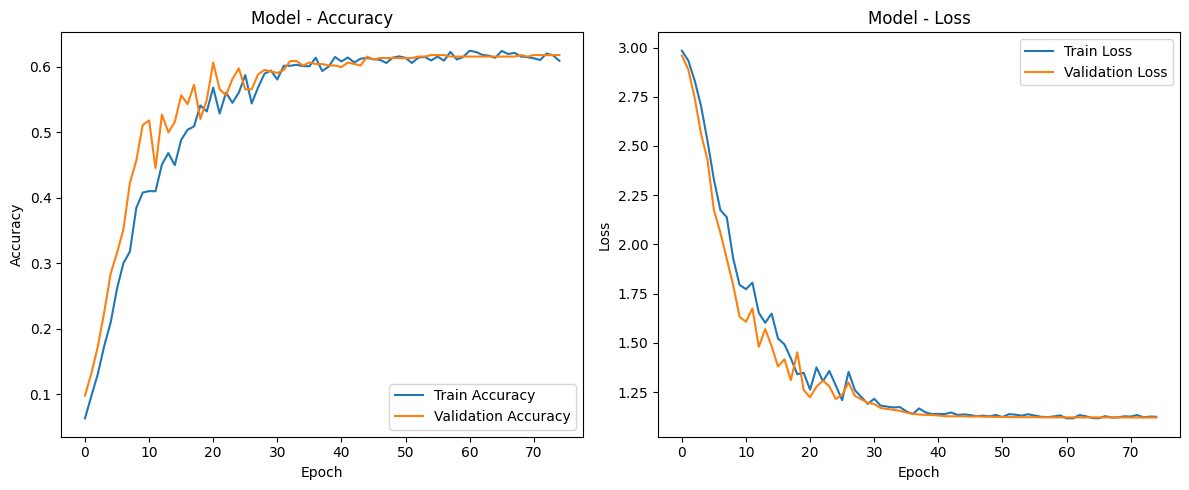

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step

Evaluation for Model:
Accuracy: 0.8400
Precision: 0.8911
Recall: 0.8400
F1-score: 0.8259


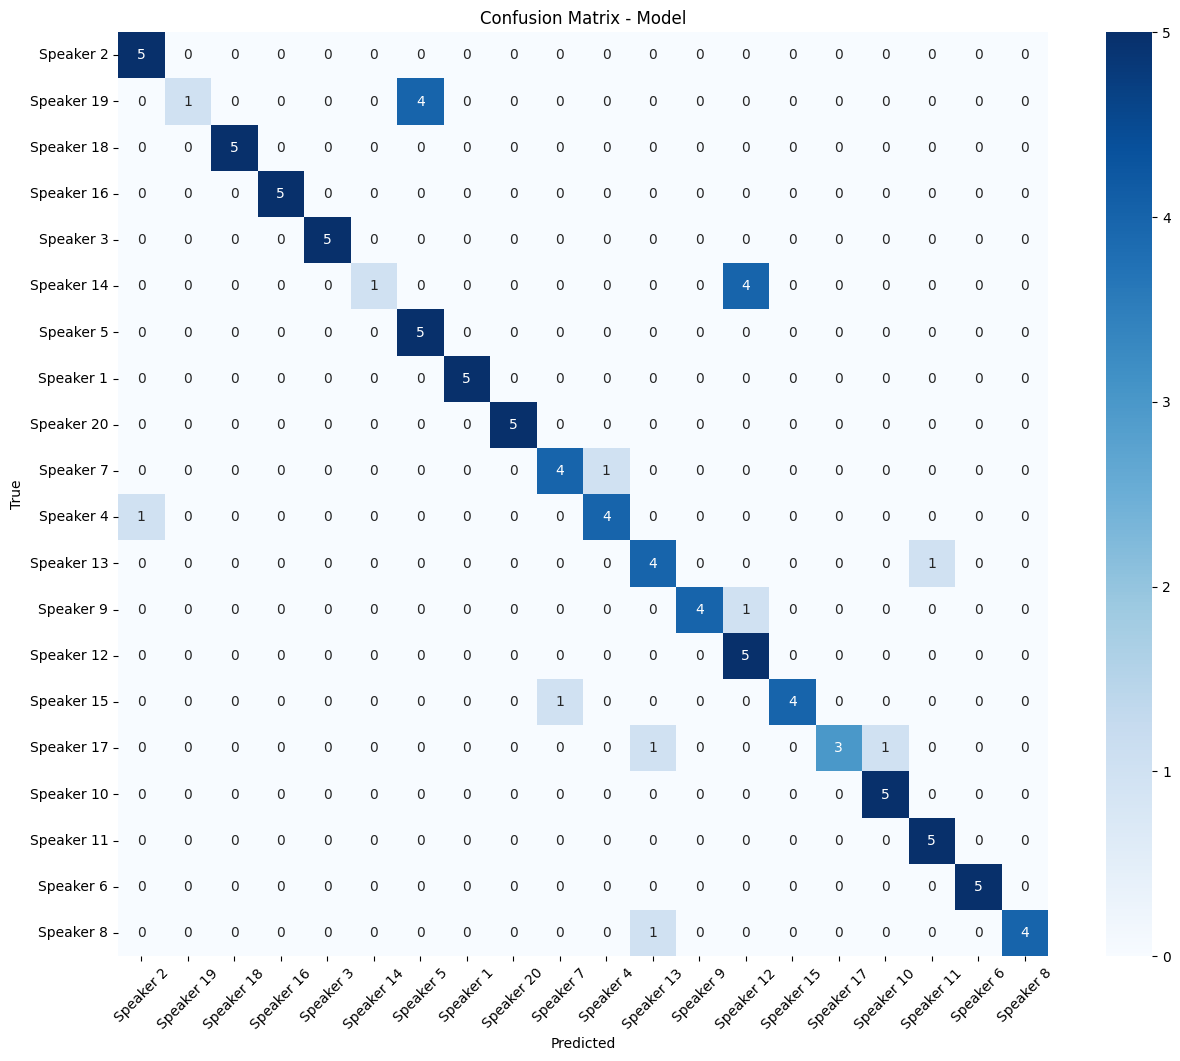

Model saved to: /content/drive/MyDrive/SLP/Model/Model.h5


In [ ]:
model, history, test_accuracy = train_and_evaluate_model(
    build_feature_fusion_model, "Model",
    X_train, y_train_int, X_val, y_val_int, label_to_index
)